#  Reference Images

## Tracks
*   Oval Track (Beginner Track)

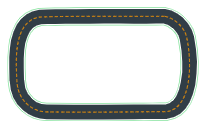
*   Badaal Track

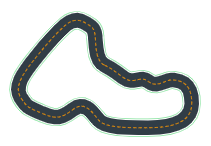
*   Po-Chun Speedway (March Qualifier)

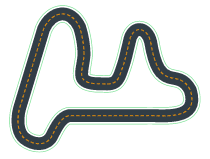
*   Lars Loop (April Qualifier)

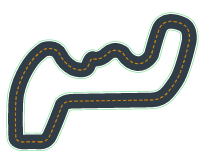

# Milestone Progress



## April Qualifier 

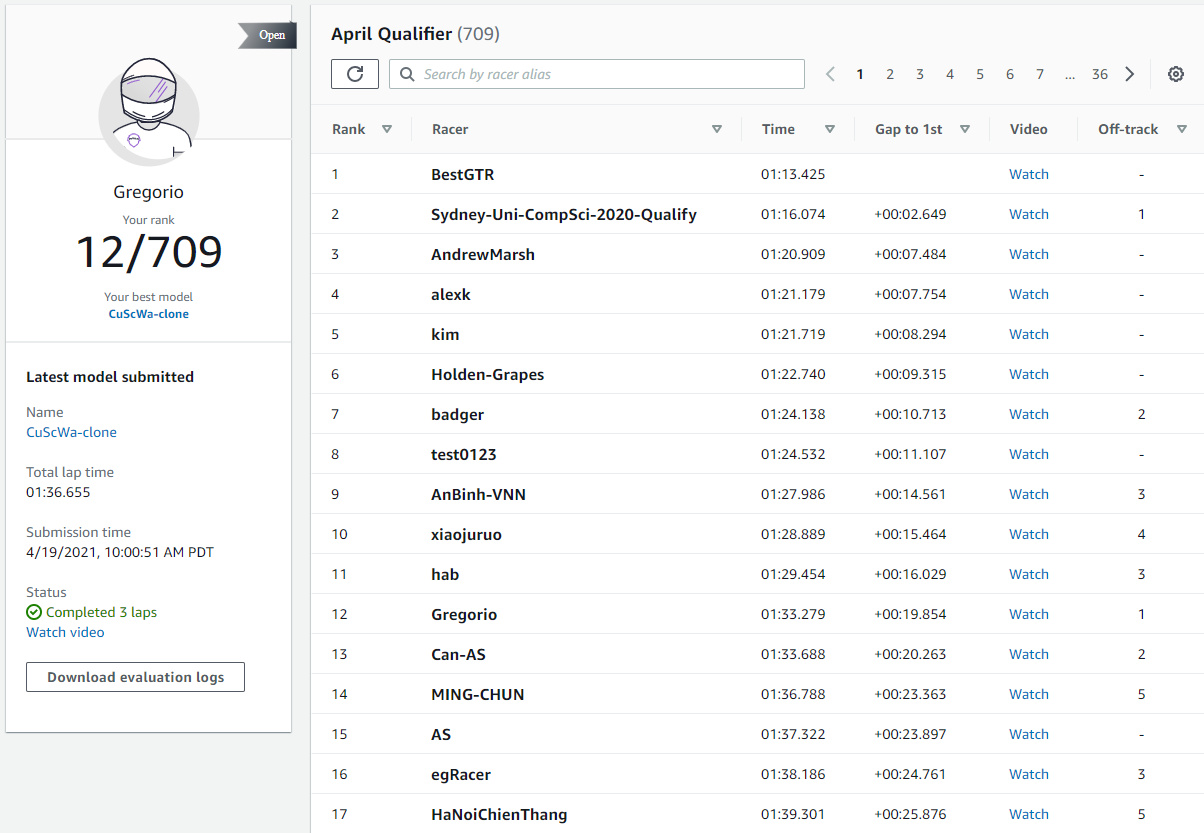

# Model Progress (Eric)

##My first AWS DeepRacer model training experience

###Model 1 (Warford)
*   Model creation date: Wed, 24 Mar 2021 01:52:04 GMT
*   Track trained on: Oval Loop 
*   Time trained: One hour
*   Training graph analysis: Approximately linear reward and average track completion over time

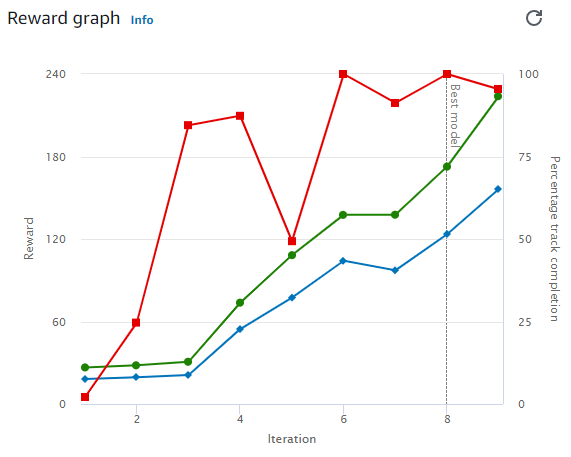

This model was a test to understand how training a model on DeepRacer worked. The reward function that will be featured below is a sample reward function given. The purpose of this reward function is to calculate the angle of the two closest waypoints to the car (one in front and behind the car) relative to the x-axis and compare it to the car's heading (which is the car's angle of direction relative to the x-axis). If the difference between these two angles is greater than the threshold, than it can be concluded the car is facing the wrong direction. As such, negatively reward the model. Evaluating the fully trained model on this beginner track, it was stable and managed to complete three laps in slightly under 30 seconds without going off track.



In [ ]:
# Sample reward function incentizing car to face the right direction
# ET's Model 1 <-- Model Warford
import math

def reward_function(params):
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']

    # Initialize the reward with typical value
    reward = 1.0

    # Calculate the direction of the center line based on the closest waypoints
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]

    # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    # Convert to degree
    track_direction = math.degrees(track_direction)

    # Calculate the difference between the track direction and the heading direction of the car
    direction_diff = abs(track_direction - heading)
    if direction_diff > 180:
        direction_diff = 360 - direction_diff

    # Penalize the reward if the difference is too large
    DIRECTION_THRESHOLD = 10.0
    if direction_diff > DIRECTION_THRESHOLD:
        reward *= 0.5

    return float(reward)

### Model 2 and Model 3 (Warford2 and Warford2-clone)
*   Model creation dates: 
    *   Thu, 25 Mar 2021 04:34:09 GMT
    *   Fri, 26 Mar 2021 18:18:00 GMT
*   Tracks trained on:
    *   Second model - Po-Chun Speedway
    *   Third model - Badaal Track
*   Time trained: One hour each = 2 hours total
*   Training graph analysis:
    * Second model

    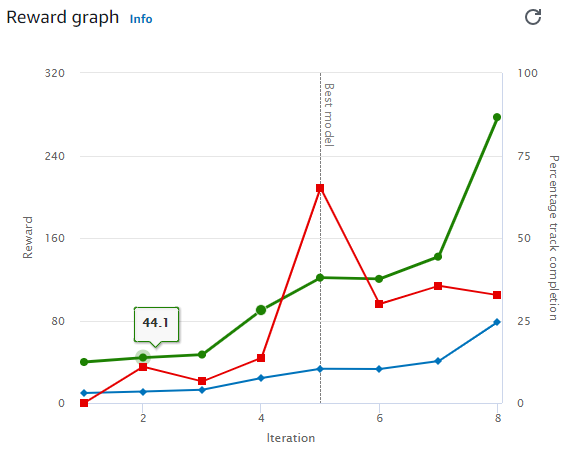
    * Third model

    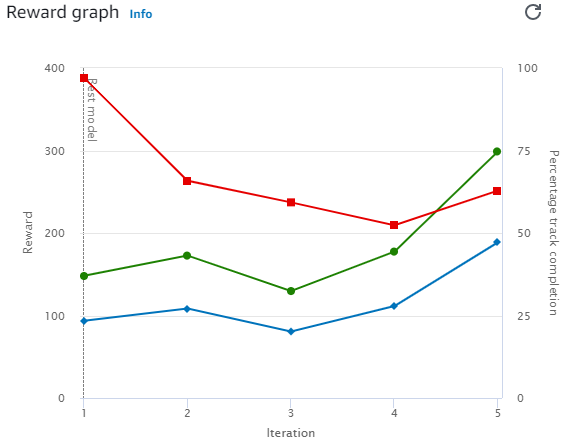

I then tried to understand how cloning a model worked so these two models use the same reward function from the previous / first model I trained but this time, I trained on the March Qualifier track to see how well it would do. Evaluating the second model would have the car go off track in the first lap but finish no problem on the remaining two. When I decided to clone the model, I wanted to see if the reward function would converge better if I tried a different track so I randomly chose the Badaal Track. Evaluating this newly trained model on the qualifer track had all three laps go off track. However, the model did not go offtrack once when I submitted it to the Virtual Circuit where it now stands at around 433/972 racers. Similar to the first model, it proved to be very stable but ultimately slow in speed.    

In [ ]:
# Sample reward function incentizing car to face the right direction
# ET's Model 2 and 3 <-- Models Warford2 and Warford2-clone
import math

def reward_function(params):
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']

    # Initialize the reward with typical value
    reward = 1.0

    # Calculate the direction of the center line based on the closest waypoints
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]

    # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    # Convert to degree
    track_direction = math.degrees(track_direction)

    # Calculate the difference between the track direction and the heading direction of the car
    direction_diff = abs(track_direction - heading)
    if direction_diff > 180:
        direction_diff = 360 - direction_diff

    # Penalize the reward if the difference is too large
    DIRECTION_THRESHOLD = 10.0
    if direction_diff > DIRECTION_THRESHOLD:
        reward *= 0.5

    return float(reward)

##April Qualifer Progress

### Model 1 (CuppTester)
*   Model creation dates:
    * Tue, 06 Apr 2021 21:40:50 GMT
    * Thu, 08 Apr 2021 03:41:30 GMT
    * Fri, 09 Apr 2021 01:48:21 GMT
    * Fri, 09 Apr 2021 03:52:24 GMT
    * Sat, 10 Apr 2021 22:13:33 GMT
*   Track trained on: Lars Loop
*   Time trained: One hour for each model
*   Training graph analysis (in order from earliest to latest):

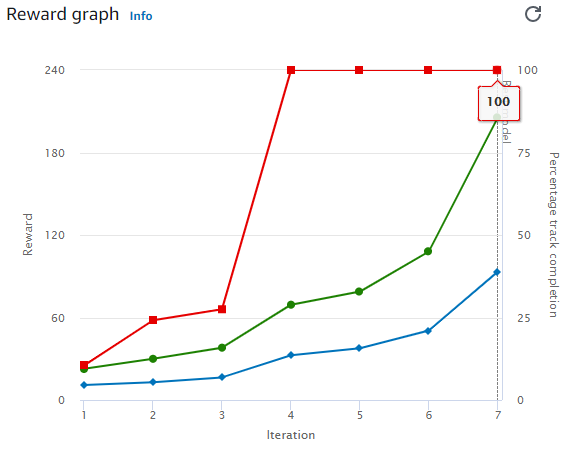

These five models are what effectively has been my April Qualifier progress at the start of the month. The first model used the default reward function for DeepRacer which basically incentizes the car to stays within the boundaries of the track where it is most ideal to be closer to the center lane. This first model was extremely stable but lacked speed.

In [ ]:
# Default reward function you see in DeepRacer when making a model
def reward_function(params):
    #################################################################################
    '''
    Example of using distance from the center
    '''

    # Read input variable
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']

    # Penalize if the car is too far away from the center
    marker_1 = 0.1 * track_width
    marker_2 = 0.5 * track_width

    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    else:
        reward = 1e-3  # likely crashed/ close to off track

    return float(reward)

###Model 2 (CuppMaster)

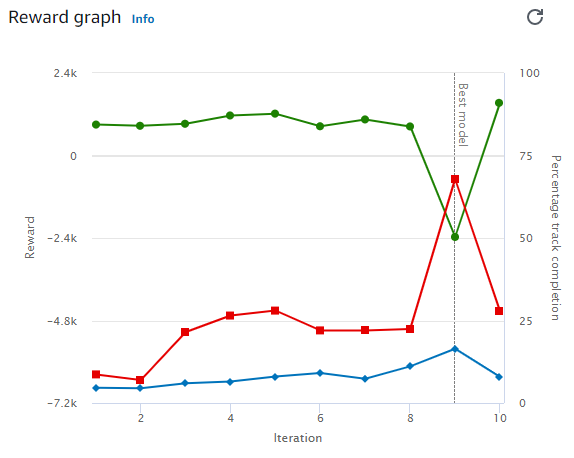


The next model used what was our v1 reward function and ended up proving to be extremely unstable, being unable to complete a lap during evaluation and ultimately being slower than the previous model. It was when I was testing this model that I realized that I had forgotten you could modify the action space. This was important considering part of our reward function penalized the car if it was not within a specific speed range of which it could not reach since the maximum speed by default was slower than the range initially set. 

In [ ]:
# Reward Function v1
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 3.5                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 2                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.4 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 1e2 # I'll set it to a placeholder value like 100 for now to see how effective it'll be -ET  

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.2
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.8
  else:
    reward *= 0.5

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.25 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
  # If the car is not steering that much, then it is probably going straight; therefore, if it is going fast, probably reward it a bit to incentivize faster speeds in straight lines -ET
  if abs(steering) < 0.1 and speed > 3 and speed < speed_thres_max: 
    current_reward *= 1.1
  
  # Complete laps in fewer steps
  if progress == 100:     # in general, completing a lap should be rewarding to encourage finishing but be balanced such that they prioritize risky behavior to always get a complete lap -
    reward += 200
  else:
    reward += progress
  
  # 1 second is 15 steps so if a car takes 1:30 to do a lap, then that means it took 90 * 15 steps; thus, reward accordingly using the fastest (at the moment) time completion as a reference
  reward -= 0.5 * steps # this will be a test to see if this deduction based on step number will cause the car to try to be faster -ET
  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

### Model 3 (CuppFord)
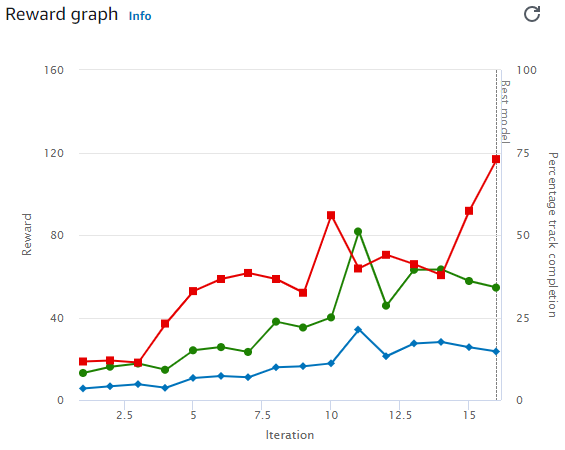

The third model, I went back to the sample center-line reward function but also added a line of code where I give add reward based on the amount of progress made. While it failed horribly in evaluation, it was definitely more stable than our v1 reward function. This was when I started changing the action space by increasing the minimum and maximum speeds of the car just to see how the car would react.

In [ ]:
def reward_function(params):
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    progress = params['progress']
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track
    
    reward += progress / 100
    
    return float(reward)

### Model 4 (CuppTester)
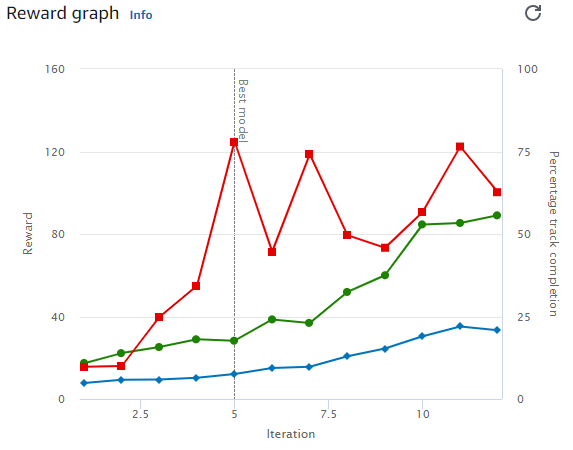

With the fourth model, the reward function was the same as the third but this time I lowered the maximum speed of the car after realizing that the speed still was too fast for this current track (I was still thinking / treating this track as if it was like the March Qualifier). By lowering the max speed, the car still could not complete a lap in evaluation but achieved better progress before failure. This model when submitted placed me at 18/146 which would now be around 58/533 and did not crash at all.

In [ ]:
def reward_function(params):
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    progress = params['progress']
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track
    reward += progress / 100
    return float(reward)

###Model 5 (CupperUpper)
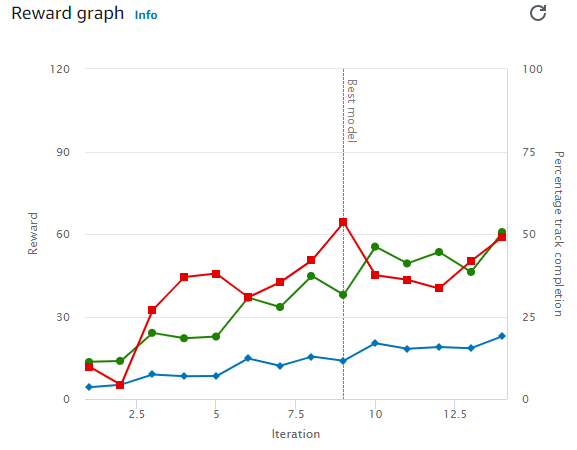
The fifth model's reward function takes the sample reward function and adds additional sample reward functions to it. These other samples include making sure the car does not steer too much and does not go offtrack. The progress reward and action space from the previous model is also incorporated. In terms of evaluation, this model did not perform well stopping at slightly below 40% track completion for each lap. However, when I submitted this model to the Virtual Circuit, to my surprise, it scored 5th place (of which it is now 10/533).

In [ ]:
def reward_function(params):
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    steering = abs(params['steering_angle']) # We don't care whether it is left or right steering
    progress = params['progress']
    offtrack = params['is_offtrack']
    reverse = params['is_reversed']
    
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    else:
        reward = 0.1
    
    reward += progress / 100
    
    ABS_STEERING_THRESHOLD = 20.0
    if steering > ABS_STEERING_THRESHOLD:
        reward *= 0.8
    
    
    if offtrack or reverse:
        reward = 1e-3
    
    return float(reward)

## Alt Account Adventures (Ft. Waiting)

### Models 1 and 2 (Warfordian and Warfordian-clone)
*   Model creation dates:
    * Mon, 12 Apr 2021 04:51:37 GMT
    * Mon, 12 Apr 2021 10:57:20 GMT
*   Track trained on: Lars Loop
*   Training Analysis:

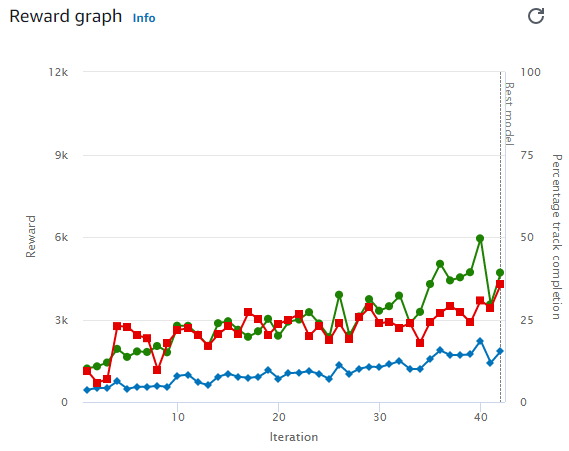    

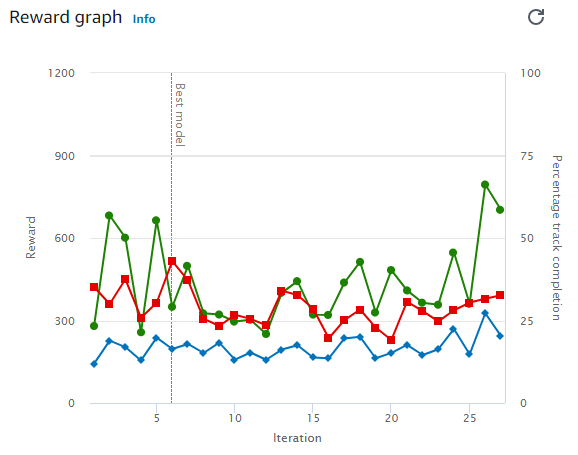

These two models were made on an alternate account because I ran out of free hours of training a model on the previous account. The purposes of these two models was to experiment and see how a revised v1 reward function would fare after effectively training the model for four hours. The first model was trained for two hours with an action space of 1 - 3 m/s speed range. The only difference from v1 was changing the min and max thresholds for speed to fit this new action space. For the second model, I cloned the previous one and updated the speed thresholds again because I felt the model was at its worst when going too fast. I also revised the progress reward section to be more threshold-based instead of flat reward every trial. While the clone did better than the original, compared to the 10th place model, it performed horrible scoring currently 78/533. What can be concluded from the experience working with these two models is that going all gung-ho with a complicated reward function is definitely not ideal even when training for four hours because it is key to grasp important aspects first (the basics essentially) and work your way upwards instead of fumble because the complicated function brings out more chaos than order.

In [ ]:
# Reward Function v2 - 4/11/2021
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 2                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 1                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.4 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 100 # I'll set it to a placeholder value like 100 for now to see how effective it'll be -ET  

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.5
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.5
  else:
    reward *= 1e-3 # Because that would mean you probably crashed or went off-course

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.5 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
    
  # Complete laps in fewer steps
  if progress == 100:    
    reward += 200
  else:
    reward += progress
  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

In [ ]:
# Reward Function v2 - 4/11/2021
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 2                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 1                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.25 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 10

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.5
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.5
  else:
    reward *= 1e-3 # Because that would mean you probably crashed or went off-course

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.5 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
    
  # Complete laps in fewer steps
  if (progress >= 75):
    reward += 1.5 * progress
  elif (progress >= 50):
    reward += progress
  else:
    reward *= 0.8

  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

### Models 3 and 4 (Warupp and Warupp-Discrete)
*   Model creation dates:
    * Thu, 15 Apr 2021 02:33:45 GMT
    * Thu, 15 Apr 2021 04:21:54 GMT
*   Track trained on: Lars Loop
*   Time trained: One hour for each model
*   Training graph analysis (in order from earliest to latest):

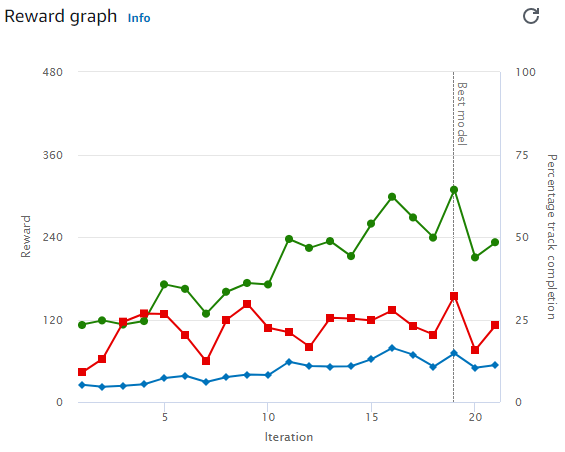

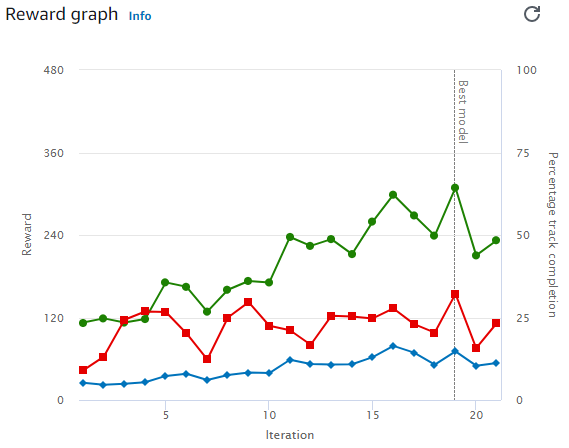

These two models use a new reward function I came up with where it takes the sample reward function that ensures the car is facing the correct direction and has it such that we look at the next three waypoints in front of the agent and gauge whether or not the track ahead is straight or curved. The reward function then punishes if the agent is moving too fast during a turn or too slow during a straightaway. Initial reward is determined by the initial location of the car relative to the track. If it is offtrack, then initial reward is horrible. Otherwise, start off as if nothing happened. These two models were a test to see the difference between using a discrete and continuous model. Two cars were made. The first was continuous with an action space of: Speed: [1 : 2.5] m/s
Steering angle: [-30 : 30]°. The second was discrete and had the following defined action space: Speed: {0.83, 1.67, 2.5} m/s and Steering angle: {-30, -20, -10, 0, 10, 20, 30}°. From testing, the continuous model was faster by around 6 seconds which leaves me concluding to continue testing models with continuous models instead for the sake of consistency.



In [ ]:
# Simple reward function concept
import math
def reward_function(params):
    # The goal of this reward function is to:
      # Initialize reward based on current position relative to track <-- On track = good, Off track = bad
      # Check whether the track in front of the car is straight or curved
      # Adjust speed and heading based on the structure of the track ahead
    # Input parameters
    all_wheels_on_track = params['all_wheels_on_track'] 
    is_offtrack = params['is_offtrack']
    closest_waypoints = params['closest_waypoints']
    waypoints = params['waypoints']    
    speed = params['speed']
    heading = params['heading']

    # Initialize reward based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3
    else:
      reward = 10
    
    # Check whether the track in front of car is straight or curved
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    # The idea is to find the next three points ahead of the car: 
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    final_point = waypoints[(closest_waypoints[1] + 2) % num_waypoints] # the final point we will be looking at 
    # Next we take those three points and make two lines which represent the future trajectory of the track
    # These next two variables will be the angles created from those lines relative to the x-axis
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    future_direction = math.degrees(math.atan2(final_point[1] - after_point[1], final_point[0] - after_point[0]))
    # Because math.atan2 has a range from -180 to 180 degrees, the following code is to adjust all values to be positive angles
    if next_direction < 0: next_direction += 360
    if future_direction < 0: future_direction += 360
    # The difference between these two angles will determine how straight the road ahead is    
    difference = abs(future_direction - next_direction) 

    # Adjust speed and heading based on structure of track ahead
    turn_speed = 1.5 # maximum speed you should be at when turning
    min_speed = 2 # minimum speed you should be at when driving straight
    if difference > 10 and speed > turn_speed: # if the track is curved and you are speeding, penalty
        reward *= 0.7
    if difference <= 10 and speed < min_speed: # if the track is straight and you are slow, penalty
        reward *= 0.7
    if heading < 0: heading += 360 # make the heading range 0 to 360 instead of -180 to 180
    direction_difference = abs(future_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 10: # if the difference between the heading and the future direction of the track is too big, penalty
      reward *= 0.5

    return float(reward)

### Models 5 and 6 (Scalzupp and Scalzupp-clone)
*   Model creation dates:
    * Thu, 15 Apr 2021 07:36:42 GMT
    * Thu, 15 Apr 2021 10:34:57 GMT
*   Track trained on: Lars Loop
*   Time trained: Two hours for original, one hour for clone
*   Training graph analysis (in order from earliest to latest):

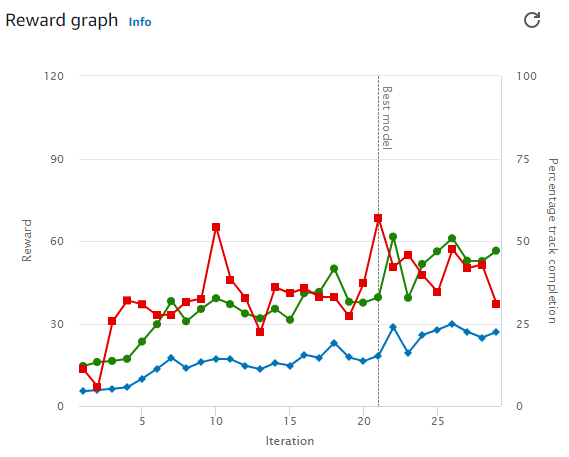

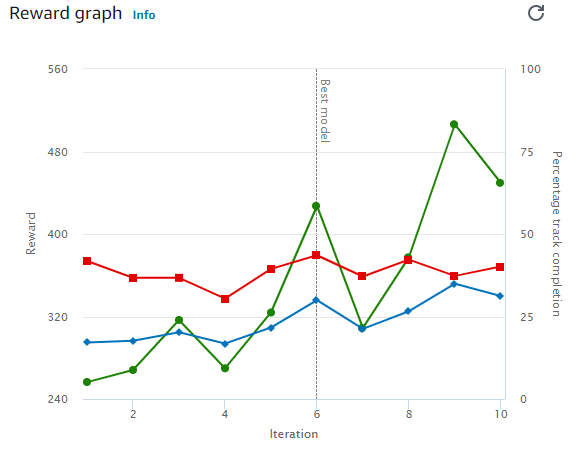

These two models were basically trying to build off of the previous two models where I decided to stick to the same reward function as the Warupp models but this time modifying the threshold values for what is considered a straight or curved part of the track. The clone of this model would then have its reward function be modified by haphazardly combining both the center-line and this current reward function (the two that did really good individually). The result was something as effective but not nearly as good as the center line one. While the clone performed better and faster than the original, I still believe testing training length or testing / adjusting individual reward functions is the next step.

In [ ]:
# Simple reward function concept
import math
def reward_function(params):
    # The goal of this reward function is to:
      # Initialize reward based on current position relative to track <-- On track = good, Off track = bad
      # Check whether the track in front of the car is straight or curved
      # Adjust speed and heading based on the structure of the track ahead
    # Input parameters
    all_wheels_on_track = params['all_wheels_on_track'] 
    is_offtrack = params['is_offtrack']
    closest_waypoints = params['closest_waypoints']
    waypoints = params['waypoints']    
    speed = params['speed']
    heading = params['heading']

    # Initialize reward based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3
    else:
      reward = 1.0
    
    # Check whether the track in front of car is straight or curved
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    # The idea is to find the next three points ahead of the car: 
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    final_point = waypoints[(closest_waypoints[1] + 2) % num_waypoints] # the final point we will be looking at 
    # Next we take those three points and make two lines which represent the future trajectory of the track
    # These next two variables will be the angles created from those lines relative to the x-axis
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    future_direction = math.degrees(math.atan2(final_point[1] - after_point[1], final_point[0] - after_point[0]))
    # Because math.atan2 has a range from -180 to 180 degrees, the following code is to adjust all values to be positive angles
    if next_direction < 0: next_direction += 360
    if future_direction < 0: future_direction += 360
    # The difference between these two angles will determine how straight the road ahead is    
    difference = abs(future_direction - next_direction) 

    # Adjust speed and heading based on structure of track ahead
    turn_speed = 1.5 # maximum speed you should be at when turning
    if difference > 15 and speed > turn_speed: # if the track is curved and you are speeding, penalty
        reward *= 0.7
    if heading < 0: heading += 360 # make the heading range 0 to 360 instead of -180 to 180
    direction_difference = abs(future_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 15: # if the difference between the heading and the future direction of the track is too big, penalty
      reward *= 0.5

    return float(reward)

In [ ]:
# Simple reward function concept
import math
def reward_function(params):
    # The goal of this reward function is to:
      # Initialize reward based on current position relative to track <-- On track = good, Off track = bad
      # Check whether the track in front of the car is straight or curved
      # Adjust speed and heading based on the structure of the track ahead
    # Input parameters
    all_wheels_on_track = params['all_wheels_on_track'] 
    is_offtrack = params['is_offtrack']
    closest_waypoints = params['closest_waypoints']
    waypoints = params['waypoints']    
    speed = params['speed']
    heading = params['heading']
    is_reversed = params['is_reversed']
    progress = params['progress']
    steering = params['steering_angle']
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    
    # Check whether the track in front of car is straight or curved
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    # The idea is to find the next three points ahead of the car: 
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    final_point = waypoints[(closest_waypoints[1] + 2) % num_waypoints] # the final point we will be looking at 
    # Next we take those three points and make two lines which represent the future trajectory of the track
    # These next two variables will be the angles created from those lines relative to the x-axis
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    future_direction = math.degrees(math.atan2(final_point[1] - after_point[1], final_point[0] - after_point[0]))
    # Because math.atan2 has a range from -180 to 180 degrees, the following code is to adjust all values to be positive angles
    if next_direction < 0: next_direction += 360
    if future_direction < 0: future_direction += 360
    # The difference between these two angles will determine how straight the road ahead is    
    difference = abs(future_direction - next_direction) 

    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.4 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 10
    elif distance_from_center <= marker_2:
        reward = 5
    elif distance_from_center <= marker_3:
        reward = 1
    else:
        reward = 1e-3  # likely crashed/ close to off track

    # Adjust speed and heading based on structure of track ahead
    turn_speed = 1.5 # maximum speed you should be at when turning
    if difference > 15 and speed > turn_speed: # if the track is curved and you are speeding, penalty
        reward *= 0.7
    if heading < 0: heading += 360 # make the heading range 0 to 360 instead of -180 to 180
    direction_difference = abs(future_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 15: # if the difference between the heading and the future direction of the track is too big, penalty
      reward *= 0.5
    if steering > 20:
        reward *= 0.8
    
    reward += progress / 100
    if not all_wheels_on_track or is_offtrack or is_reversed:
      reward = 1e-3    
    return float(reward)

## Alt Account Adventure 2

### Model 1 (ScCuWa)
*   Model creation date: Sun, 18 Apr 2021 23:31:16 GMT
*   Track trained on: Lars Loop
*   Time trained: Five hours
*   Training graph analysis:

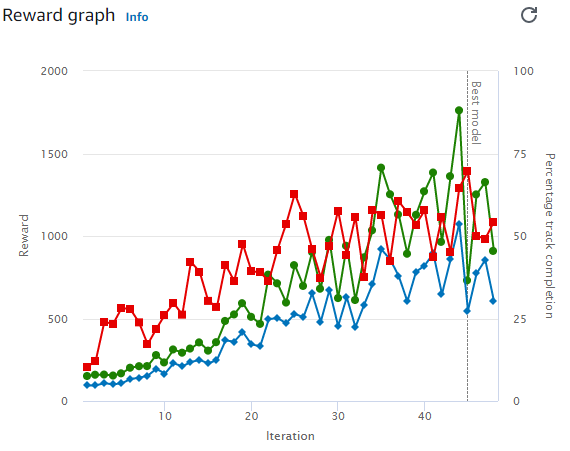

This model is the first of probably two models that I will train on a third alt account. The reward function this time takes the reward function of Scalzupp-clone and restructures / reorganizes the code to adopt this philosophy of "Reward first and punish later" where all the good rewards that I could think of regarding the reward function would create the initial reward followed by all of the punishments for horrible behavior. In the end, after training for 5 hours, this model could have been the best out of all the ones tested so far. However, it scored below the initial center line progress reward function but would have been better had it not crashed one extra time. This seems like really good news regarding the effectiveness of this combined reward function of which how reward gets calculated should potentially be improved.

In [ ]:
# Simple reward function concept v2 <-- Combine center line progress and look several waypoints ahead / right direction reward functions
# Action space: 1 - 2 m/s speed, -30 to 30 degree angle turns
# Idea: Reward first but then punish afterwards / Good news, Bad news approach
import math
def reward_function(params):
    # Input parameters
    all_wheels_on_track = params['all_wheels_on_track'] 
    is_offtrack = params['is_offtrack']
    closest_waypoints = params['closest_waypoints']
    waypoints = params['waypoints']    
    speed = params['speed']
    heading = params['heading']
    track_width = params['track_width']
    distance_from_center = params['distance_from_center'] 
    steering = abs(params['steering_angle'])   
    progress = params['progress']
    
    # Initial reward
    reward = 10

    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width # 20% track
    marker_2 = 0.2 * track_width # 40% track
    marker_3 = 0.4 * track_width # 80% track
    
    # First check current position on the track relative to center line
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward *= 1.5
    elif distance_from_center <= marker_2:
        reward *= 0.8
    elif distance_from_center <= marker_3:
        reward *= 0.5
    else:
        reward = 1e-3  # likely crashed/ close to off track

    # Reward based on how much progress was made so far no matter if they fail immediately
    reward += progress / 10.0 
    
    # Check whether the track in front of car is straight or curved
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    # The idea is to find the next three points ahead of the car: 
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    final_point = waypoints[(closest_waypoints[1] + 2) % num_waypoints] # the final point we will be looking at 
    # Next we take those three points and make two lines which represent the future trajectory of the track
    # These next two variables will be the angles created from those lines relative to the x-axis
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    future_direction = math.degrees(math.atan2(final_point[1] - after_point[1], final_point[0] - after_point[0]))
    # The difference between these two angles will determine how straight the road ahead is    
    difference = abs(future_direction - next_direction) 
    if difference > 180:
      difference = 360 - difference

    # Adjust speed and heading based on structure of track ahead
    turn_speed = 1.5 # maximum speed you should be at when turning
    if difference > 15 and speed > turn_speed: # if the track is curved and you are speeding, penalty
        reward *= 0.5
    direction_difference = abs(future_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    if direction_difference > 15: # if the difference between the heading and the future direction of the track is too big, penalty
      reward *= 0.5

    # Make sure the car does not zigzag as much
    if steering > 20.0:
      reward *= 0.8

    # Reward based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3

    return float(reward)

### Model 2 (ScCuWa-clone)
*   Model creation date: Mon, 19 Apr 2021 07:59:29 GMT
*   Track trained on: Lars Loop
*   Time trained: Five hours
*   Training graph analysis:

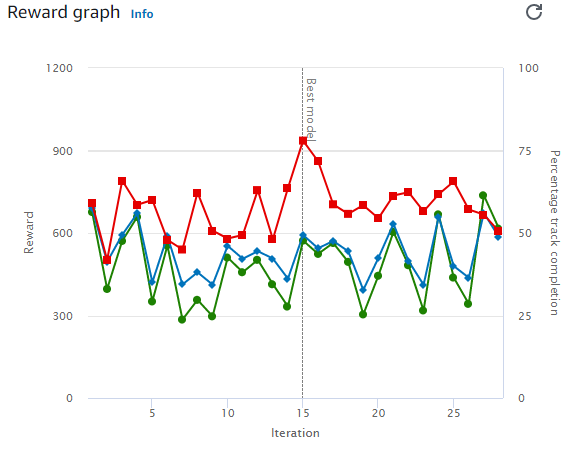

This model is a clone of the previous model because I found the ScCuWa model to be so successful and close to beating our best model (which is currently 19/709). And so this model takes the previous five hours worth of training in order to train it again for an additional five hours (for a grand total of my 10 free hours). Looking at the training graph, it does not look good at all as it does not have a linear relationship. In the end however, this model performed better than the original and is currently 12/709 and having crashed only one time (making it also the most stable model made that also scored in the top 20). The reward function was altered slightly to test if looking into the near future is better than the farther future. What that means is the original function compared the agent's heading to the third waypoint in the future. This new reward function checks with the second because it probably is better to have the car be in the right direction for what is closer to them (in the case the track ahead causes the car to want to incentivize being in the wrong direction if the track bends <-- where like it should be facing in the second quadrant but is encouraged to face in the fourth quadrant because the track in the far future is like that instead of the near future being more accurate). 

In [ ]:
# Simple reward function concept v2 <-- Combine center line progress and look several waypoints ahead / right direction reward functions
# Action space: 1 - 2 m/s speed, -30 to 30 degree angle turns
# Idea: Reward first but then punish afterwards / Good news, Bad news approach
import math
def reward_function(params):
    # Input parameters
    all_wheels_on_track = params['all_wheels_on_track'] 
    is_offtrack = params['is_offtrack']
    closest_waypoints = params['closest_waypoints']
    waypoints = params['waypoints']    
    speed = params['speed']
    heading = params['heading']
    track_width = params['track_width']
    distance_from_center = params['distance_from_center'] 
    steering = abs(params['steering_angle'])   
    progress = params['progress']
    
    # Initial reward
    reward = 1.0

    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width # 20% track
    marker_2 = 0.2 * track_width # 40% track
    marker_3 = 0.4 * track_width # 80% track
    
    # First check current position on the track relative to center line
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward *= 1.2
    elif distance_from_center <= marker_2:
        reward *= 0.8
    elif distance_from_center <= marker_3:
        reward *= 0.5
    else:
        reward = 1e-3  # likely crashed/ close to off track

    # Reward based on how much progress was made so far no matter if they fail immediately
    reward += progress / 10.0 
    
    # Check whether the track in front of car is straight or curved
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    # The idea is to find the next three points ahead of the car: 
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    final_point = waypoints[(closest_waypoints[1] + 2) % num_waypoints] # the final point we will be looking at 
    # Next we take those three points and make two lines which represent the future trajectory of the track
    # These next two variables will be the angles created from those lines relative to the x-axis
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    future_direction = math.degrees(math.atan2(final_point[1] - after_point[1], final_point[0] - after_point[0]))
    # The difference between these two angles will determine how straight the road ahead is    
    difference = abs(future_direction - next_direction) 
    if difference > 180:
      difference = 360 - difference

    # Adjust speed and heading based on structure of track ahead
    turn_speed = 1.5 # maximum speed you should be at when turning
    if difference > 15 and speed > turn_speed: # if the track is curved and you are speeding, penalty
        reward *= 0.5
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    if direction_difference > 15: # if the difference between the heading and the future direction of the track is too big, penalty
      reward *= 0.5

    # Make sure the car does not zigzag as much
    if steering > 20.0:
      reward *= 0.8

    # Reward based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3

    return float(reward)

## Final Models

### Model 1 (FHT)
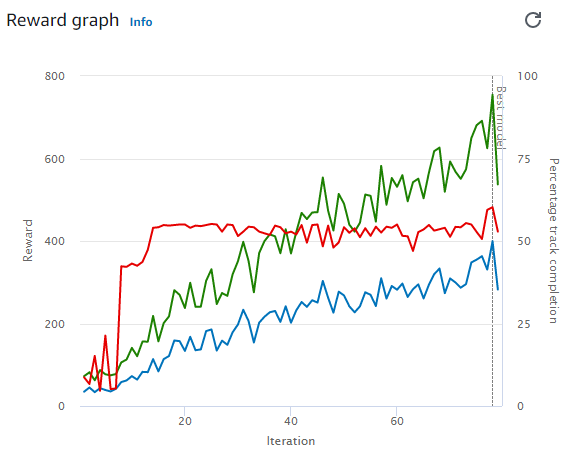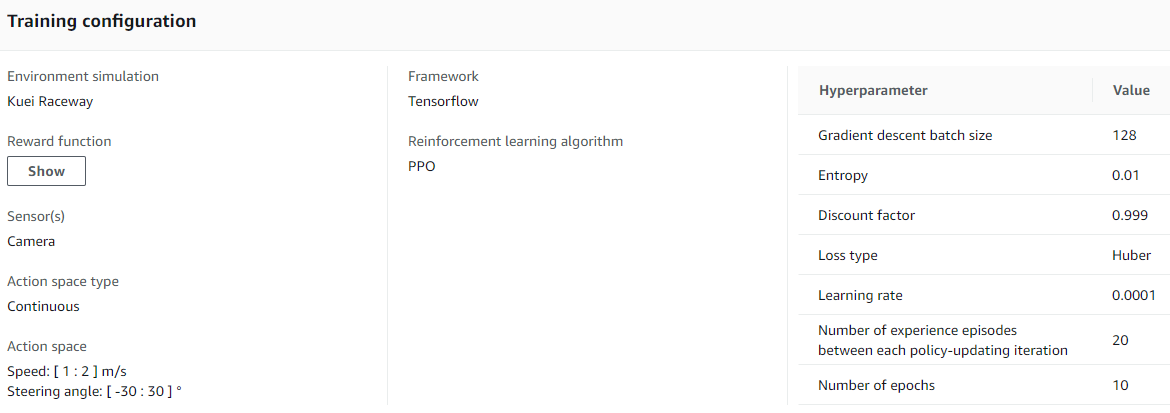

### Models 2 and 3 (Discrete vs Continuous THT)
Discrete

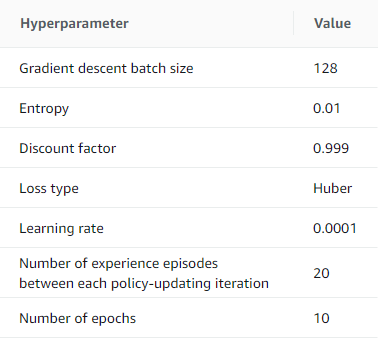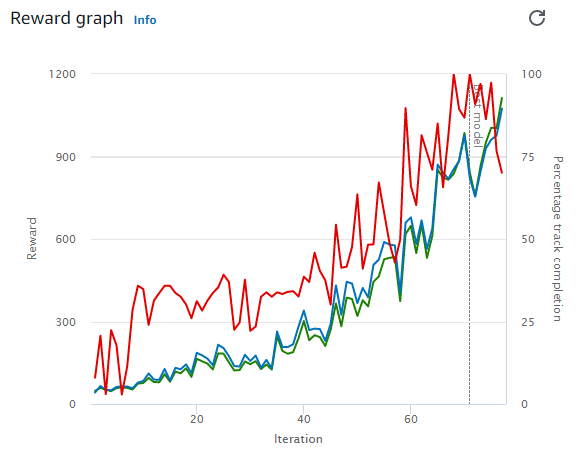

Continuous

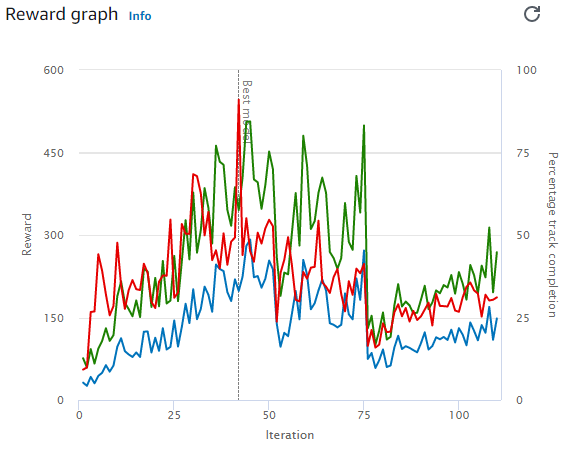

### Model 4 and 5 (MB and MB-2)
MB

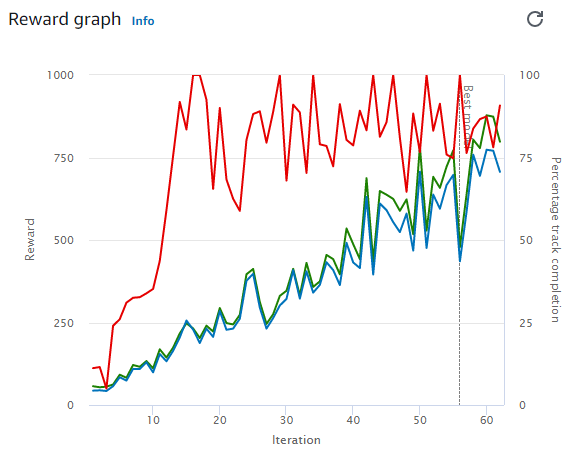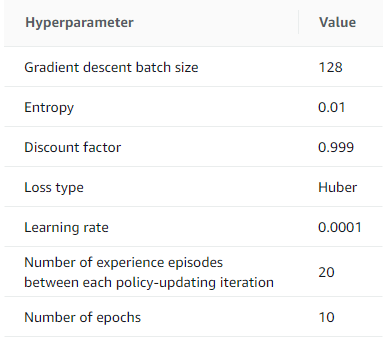

MB-2

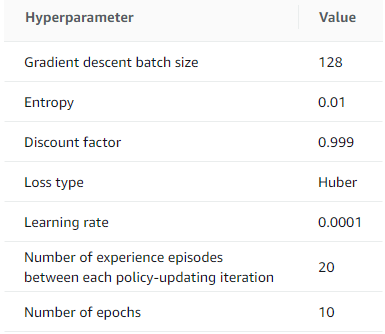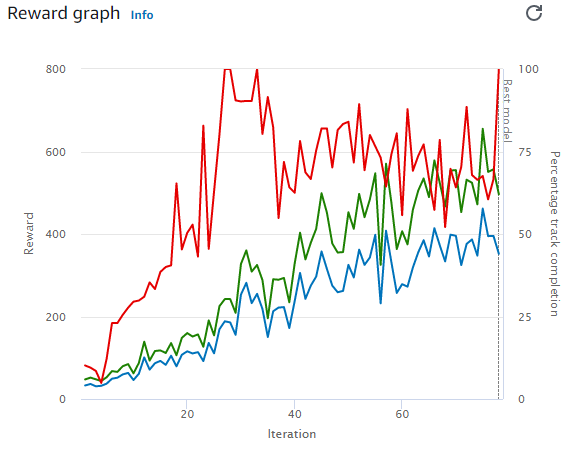

In [ ]:
# Model MB and MB-2 Reward Function
#THT
import math
def reward_function(params):    
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']
    speed = params['speed']
    heading = params['heading']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    is_offtrack = params['is_offtrack']

    # Initial reward
    reward = 1.0

    # Center-line reward
    half_track = track_width / 2
    reward += math.exp(-3 * ((distance_from_center / half_track) ** 2))

    # Facing correct direction reward
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    direc_reward = 1 - ((direction_difference / 15) ** 2) # all the good / positive reward is when the heading is within 10 degrees of the appropriate angle
    if direc_reward <= 0:
      direc_reward = 0
    reward += direc_reward
    
    # Reward based on progress made
    reward += math.sqrt(progress / steps) 

    # Penalty based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3    

    return float(reward)

### Model 6 and 7 (Stupp and THT3)

Stupp

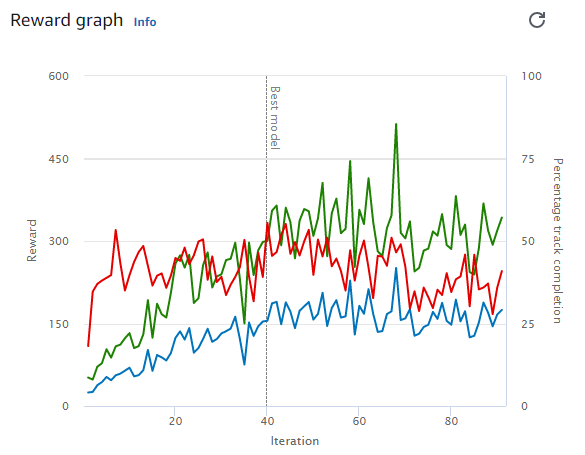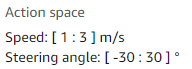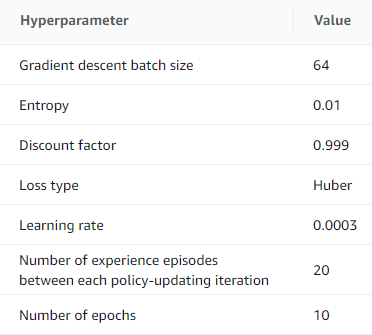

THT3

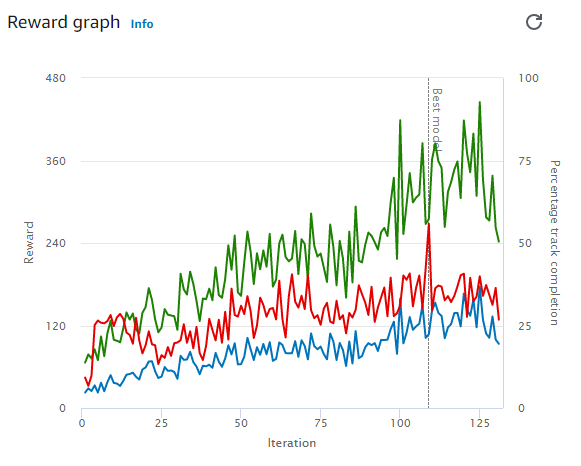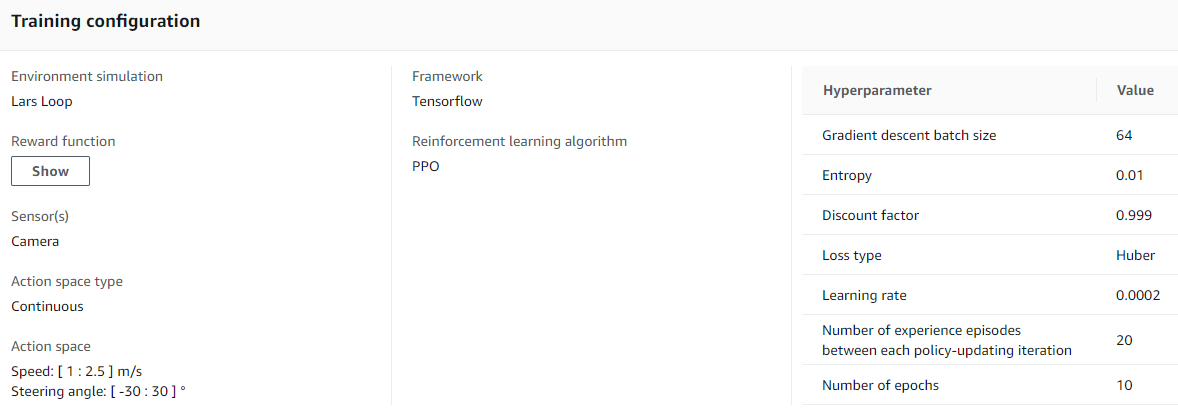

In [ ]:
# Stupp
import math
def reward_function(params):    
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']
    speed = params['speed']
    heading = params['heading']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    is_offtrack = params['is_offtrack']

    # Initial reward
    reward = 1.0

    # Center-line reward
    half_track = track_width / 2
    reward += math.exp(-3 * ((distance_from_center / half_track) ** 2))

    # Facing correct direction reward
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    direc_reward = 1 - ((direction_difference / 15) ** 2) # all the good / positive reward is when the heading is within 10 degrees of the appropriate angle
    if direc_reward <= 0:
      direc_reward = 0
    reward += direc_reward
    
    # Reward based on progress made
    reward += math.sqrt(progress / steps) 

    # Penalty based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3    

    return float(reward)

In [ ]:
# THT3
import math
def reward_function(params):    
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']
    speed = params['speed']
    heading = params['heading']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    is_offtrack = params['is_offtrack']

    # Initial reward
    reward = 1.0

    # Center-line reward
    half_track = track_width / 2
    reward += 1.5 * math.exp(-3 * ((distance_from_center / half_track) ** 2))

    # Facing correct direction reward
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    direc_reward = 2 * (1 - ((direction_difference / 15) ** 2)) # all the good / positive reward is when the heading is within 10 degrees of the appropriate angle
    if direc_reward <= 0:
      direc_reward = 0
    reward += direc_reward
    
    # Reward based on progress made
    reward += math.sqrt(progress / steps) 

    # Penalty based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3    

    return float(reward)

### Model 8 and 9 (JMach and JMachio - Best Model)

JMach

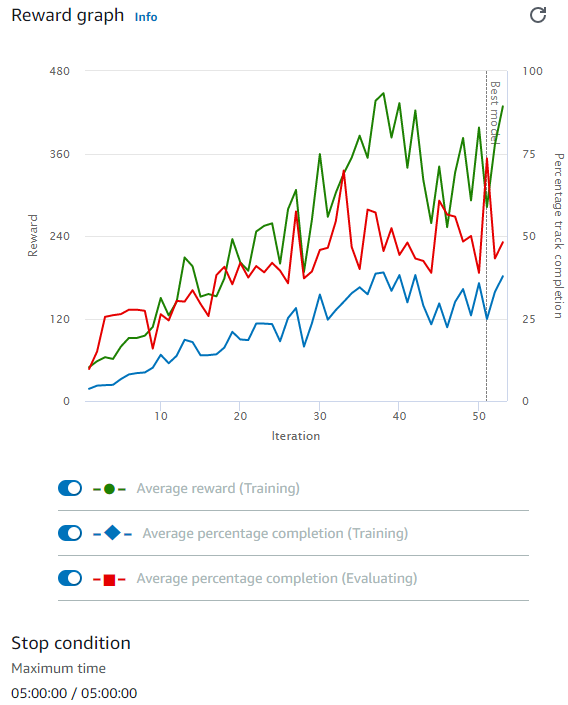
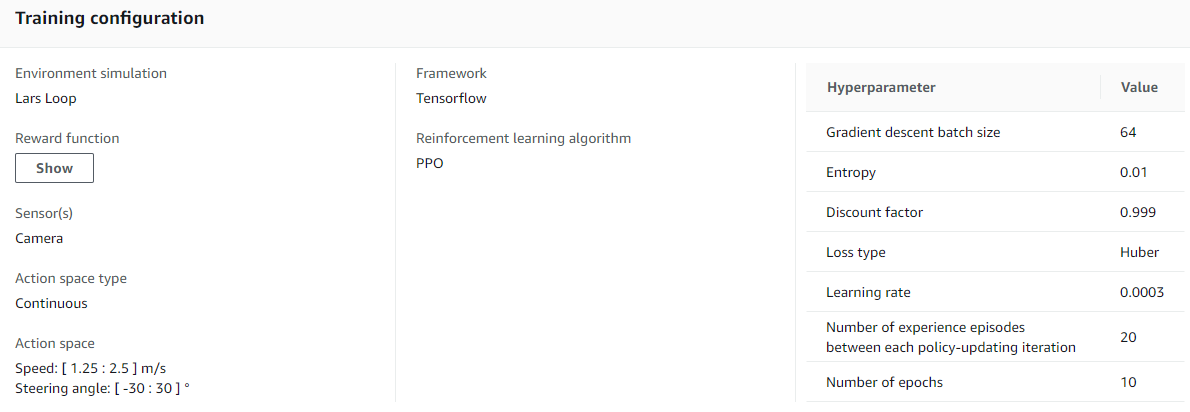

JMachio - Best Model (21st place April Qualifier 2021)

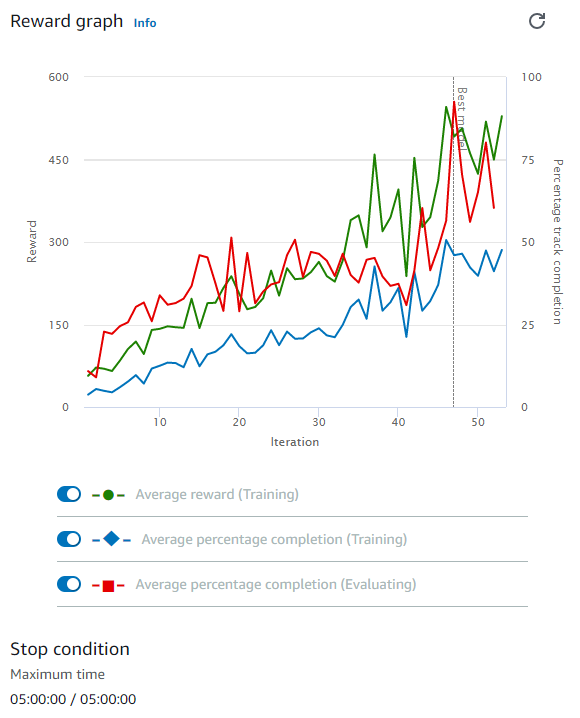
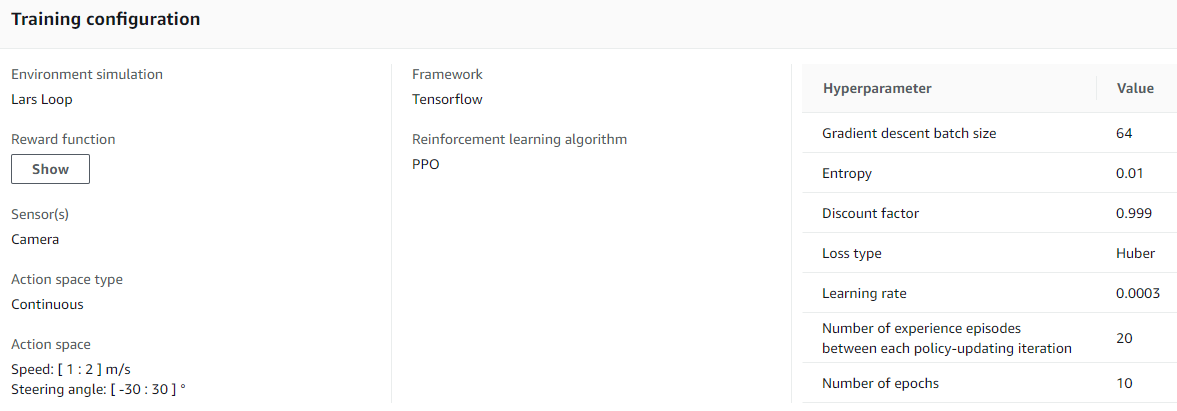
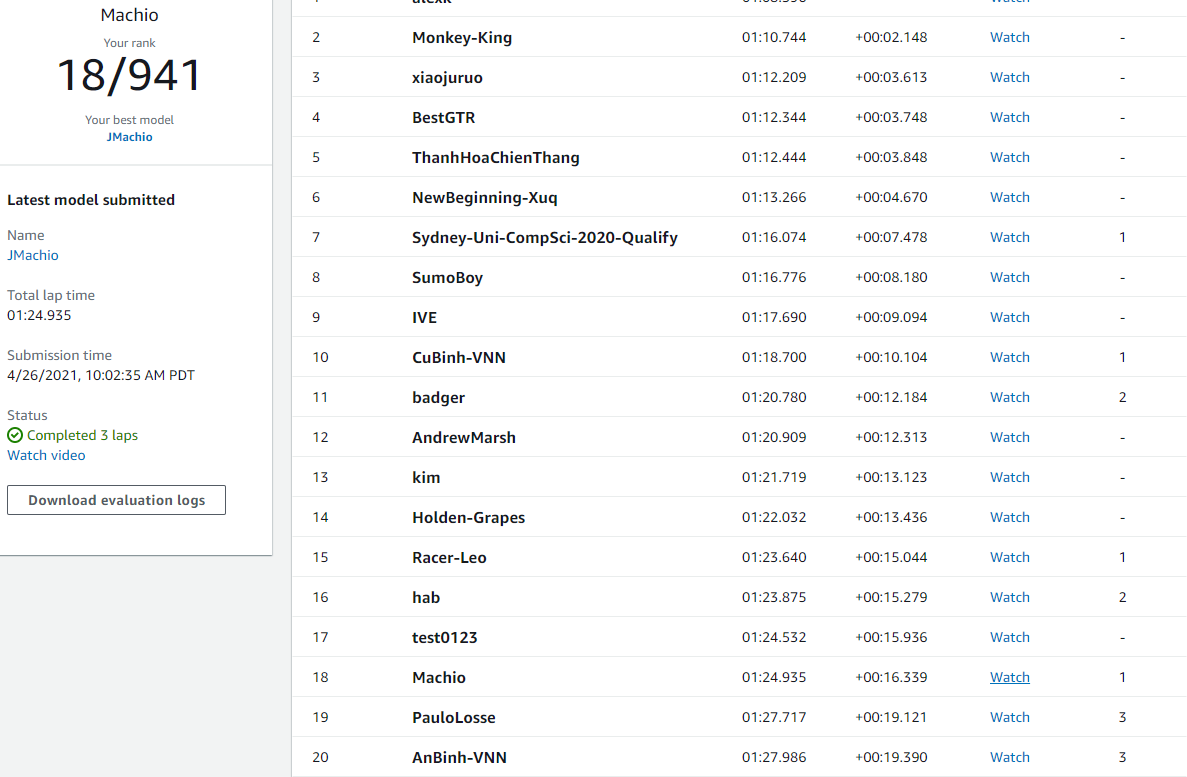


In [ ]:
# Model JMach
import math
def reward_function(params):    
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']
    speed = params['speed']
    heading = params['heading']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    is_offtrack = params['is_offtrack']

    # Initial reward
    reward = 1.0

    # Center-line reward
    half_track = track_width / 2
    reward += math.exp(((distance_from_center / half_track) ** 2))

    # Facing correct direction reward
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    direc_reward = 1 - ((direction_difference / 10) ** 2) # all the good / positive reward is when the heading is within 10 degrees of the appropriate angle
    if direc_reward <= 0:
      direc_reward = 0
    reward += direc_reward
    
    # Reward based on progress made
    reward += math.sqrt(progress / steps) 

    # Penalty based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3    

    return float(reward)

In [ ]:
# Model JMachio
import math
def reward_function(params):    
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']
    speed = params['speed']
    heading = params['heading']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    is_offtrack = params['is_offtrack']

    # Initial reward
    reward = 1.0

    # Center-line reward
    half_track = track_width / 2
    reward += math.exp(((distance_from_center / half_track) ** 2))

    # Facing correct direction reward
    num_waypoints = len(waypoints) # the number of total waypoints the track has
    next_point = waypoints[closest_waypoints[1]] # the next point ahead of the car
    after_point = waypoints[(closest_waypoints[1] + 1) % num_waypoints] # the next point after that
    next_direction = math.degrees(math.atan2(after_point[1] - next_point[1], after_point[0] - next_point[0]))
    direction_difference = abs(next_direction - heading) # this difference is between the car's current heading and how the track will look in the future
    if direction_difference > 180:
      direction_difference = 360 - direction_difference
    direc_reward = 1 - ((direction_difference / 10) ** 2) # all the good / positive reward is when the heading is within 10 degrees of the appropriate angle
    if direc_reward <= 0:
      direc_reward = 0
    reward += direc_reward
    
    # Reward based on progress made
    reward += math.sqrt(progress / steps) 

    # Penalty based on current position
    if not all_wheels_on_track or is_offtrack:
      reward = 1e-3    

    return float(reward)

# Model Progress (Grace)

# Finding the Right Reward Function

### Model 1 (grace)



*  Track Trained On: Oval Track
*  Time Trained: 1 hour
*  Training graph analysis:
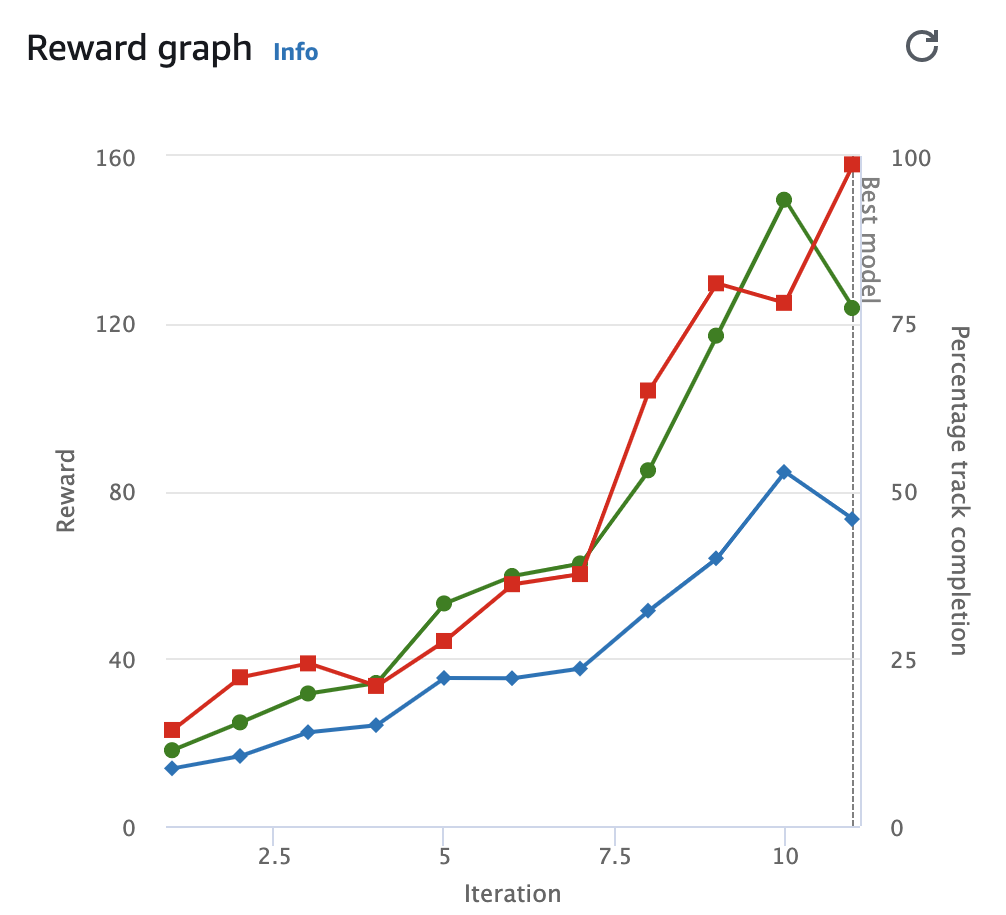




**Hyperparameters:**


*   Gradient descent batch size: 64
*   Entropy: 0.01
*   Discount factor: 0.999
*   Loss type: Huber
*   Learning Rate: 0.0003
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Discrete
*   Speed: { 0.33, 0.67, 1 } m/s
*  Steering angle: { -30, 0, 30 } °

In [ ]:
# Model 1 - grace 
# default reward function from AWS
def reward_function(params):
    '''
    Example of rewarding the agent to follow center line
    '''
    
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track
    
    return float(reward)

This model was my first venture into AWS DeepRacing. I used a default reward function supplied by the AWS console that focused on rewarding the racer to stay on the center line. The racer was incentivized to stay near the center of the track by being rewarded more the closer it was to the center line and being rewarded less the further it was. This model followed a linear relationship with it's training graph, but didn't perform that well in the March Qualifier. I think if I trained this model on the Po-Chun Speedway instead of the Oval Track it would've performed better.

## Model 2 (grace2)

*  Track Trained On: Oval Track
*  Time Trained: 1 hour
*  Training graph analysis:
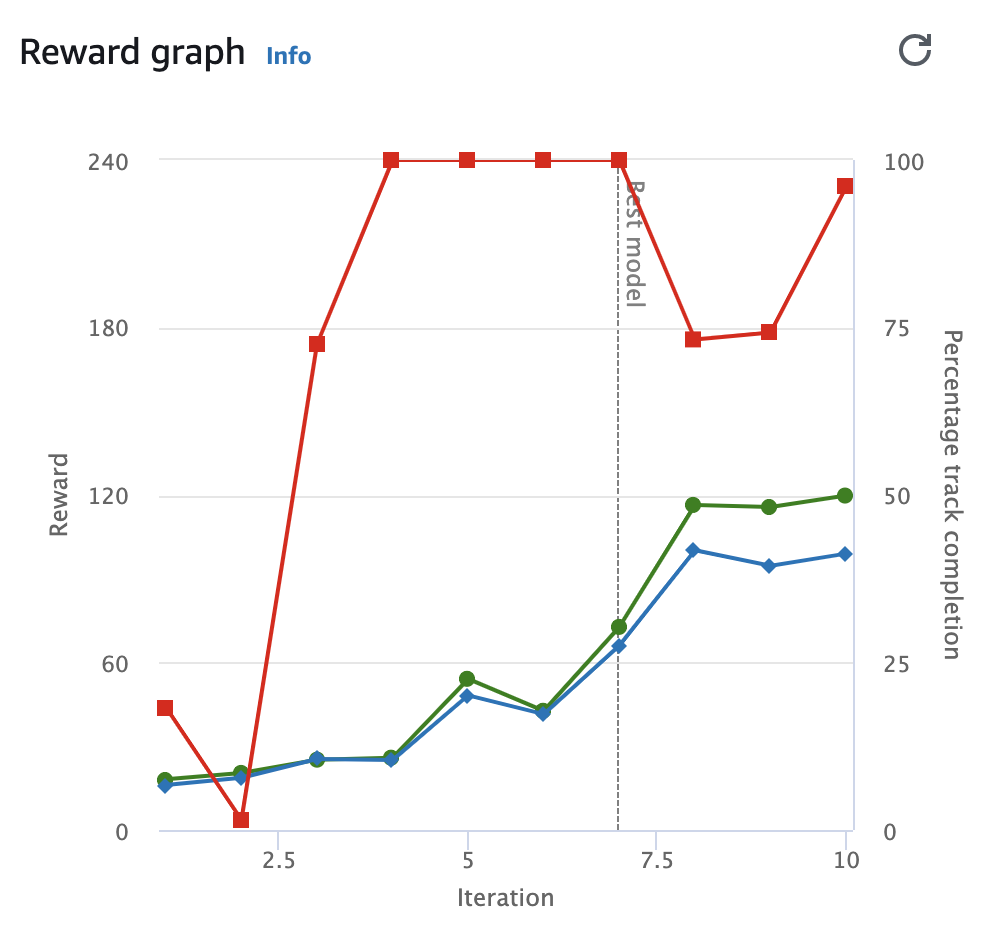


**Hyperparameters:**


*   Gradient descent batch size: 128
*   Entropy: 0.01
*   Discount factor: 0.99
*   Loss type: Huber
*   Learning Rate: 0.0002
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Discrete
*   Speed: { 0.33, 0.67, 1 } m/s
*  Steering angle: { -30, 0, 30 } °

In [ ]:
# Model 2 - grace2
# default reward function from AWS
def reward_function(params):
    '''
    Example of rewarding the agent to follow center line
    '''
    
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track
    
    return float(reward)

This was my second model and based on some of my research, I adjusted the hyperparameters to see if the racer would have better results. I used the same default reward function as I did in my first model (as well as the same training track, just to see a direct comparison). Although the training graph doesn't show a strict linear relationship, the amount rewarded to the racer was larger. I wasn't sure if this mattered as much as the percentage of track complete, but on both grace and grace2 they were able to reach at least one model during training that completed 100% of the track. 

## Model 3 (grace3)

*  Track Trained On: Po-Chun Speedway
*  Time Trained: 1 hour
*  Evaluation Performance (on March Qualifier): 05:21.658 (ranked 555/972)
*  Training graph analysis:
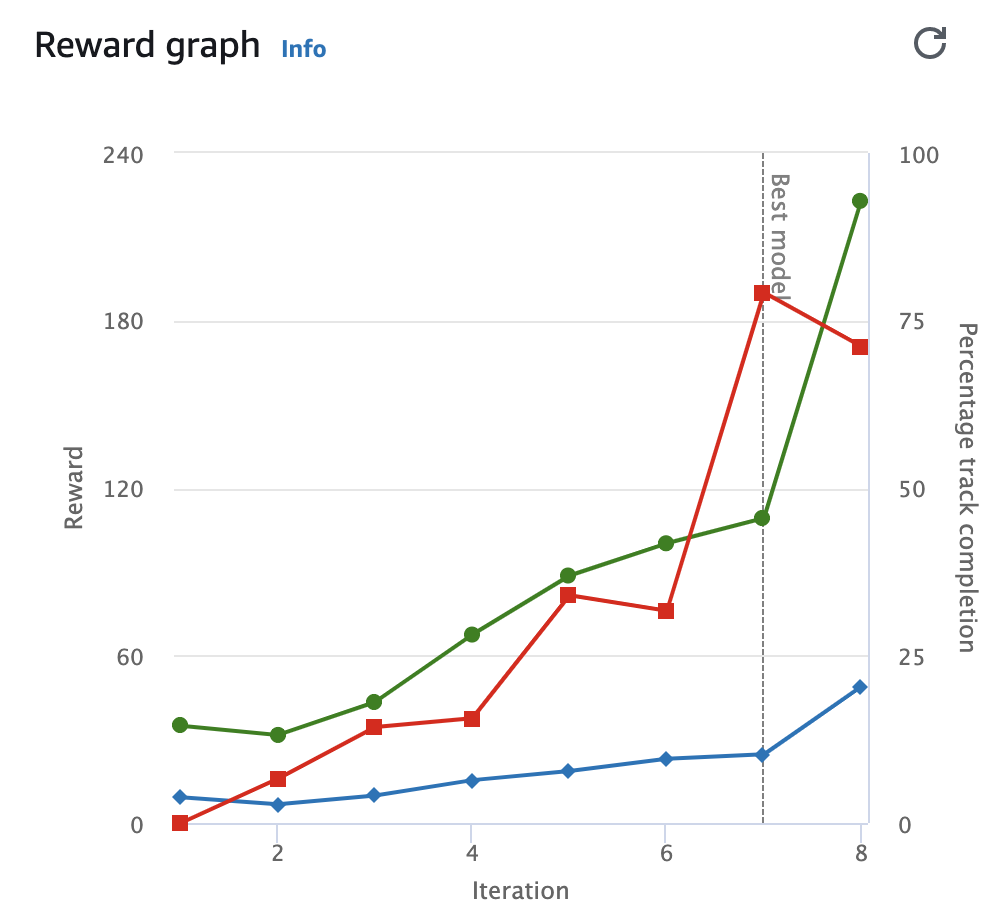



**Hyperparameters:**


*   Gradient descent batch size: 64
*   Entropy: 0.01
*   Discount factor: 0.999
*   Loss type: Huber
*   Learning Rate: 0.0003
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Discrete
*   Speed: { 0.33, 0.67, 1 } m/s
*  Steering angle: { -30, 0, 30 } °








In [ ]:
# Model 3 - grace3
# default reward function from AWS 
def reward_function(params):
    '''
    Example of rewarding the agent to follow center line
    '''
    
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track
    
    return float(reward)

This model (grace3) is very similar to my first and second models (same reward function), but this one was trained on the Po-Chun Speedway. I didn't observe a ton of difference between the model with the adjusted hyperparameters and the model with the default hyperparameters, so I chose to use the default on this model. The training graph does represent a linear relationship. Out of the three models I submitted to the March Qualifier, this one did the best, however I ranked 555/972. It wasn't a great placement but at this point I was still learning how AWS DeepRacer worked and I was happy with the linear relationship shown during training. 

## Model 4 (Grace4)

*  Track Trained On: AWS Summit Raceway
*  Time Trained: 1 hour
*  Training graph analysis: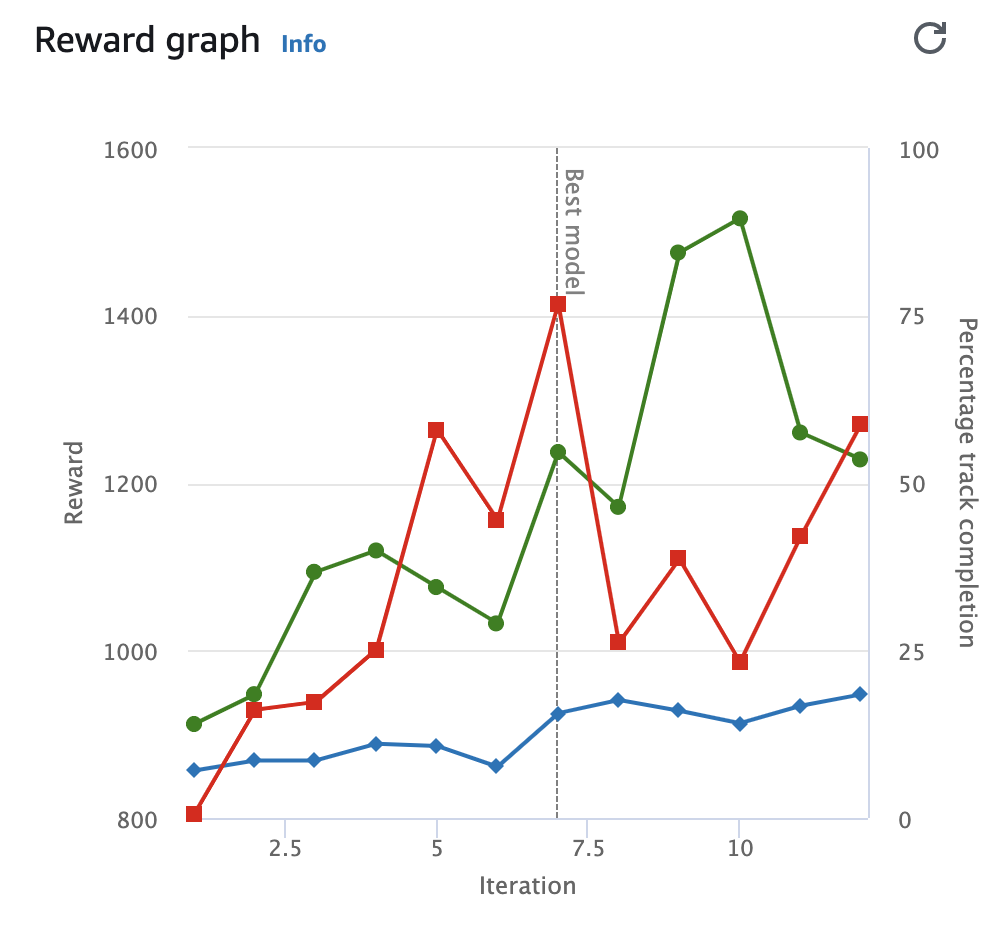



**Hyperparameters:**


*   Gradient descent batch size: 64
*   Entropy: 0.01
*   Discount factor: 0.999
*   Loss type: Huber
*   Learning Rate: 0.0003
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Discrete
*   Speed: { 0.33, 0.67, 1 } m/s
*  Steering angle: { -30, 0, 30 } °

In [ ]:
# Reward Function v1 - 4/8/2021
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 3.5                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 2                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.4 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 1e2 # I'll set it to a placeholder value like 100 for now to see how effective it'll be -ET  

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.2
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.8
  else:
    reward *= 0.5

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.25 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
  # If the car is not steering that much, then it is probably going straight; therefore, if it is going fast, probably reward it a bit to incentivize faster speeds in straight lines -ET
  if abs(steering) < 0.1 and speed > 3 and speed < speed_thres_max: 
    current_reward *= 1.1
  
  # Complete laps in fewer steps
  if progress == 100:     # in general, completing a lap should be rewarding to encourage finishing but be balanced such that they prioritize risky behavior to always get a complete lap -
    reward += 200
  else:
    reward += progress
  
  # 1 second is 15 steps so if a car takes 1:30 to do a lap, then that means it took 90 * 15 steps; thus, reward accordingly using the fastest (at the moment) time completion as a reference
  reward -= 0.5 * steps # this will be a test to see if this deduction based on step number will cause the car to try to be faster -ET
  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

This model I made on accident but decided it would be a good baseline or comparison for my model 5. Eric and I wanted to see the difference of training a model on the AWS Summit Raceway and cloning it to then train on the Lars Loop (April Qualifier track) versus just training a model on the Lars Loop. I intended to use a new racer I made on the site that had a continuous action space and a speed threshold of [0.5 : 3] m/s, but when making the model I forgot to change the vehicle before starting the training. The reward function I used, like Eric mentioned earlier, was very unstable but our first attempt at creating our own reward function. The training graph doesn't show a very strong linear relationship, especially near the end of training, and my best model occurred in the middle of the training session. 

## Model 5 (Grace5)

*  Track Trained On: AWS Summit Raceway
*  Time Trained: 1 hour
*  Training graph analysis: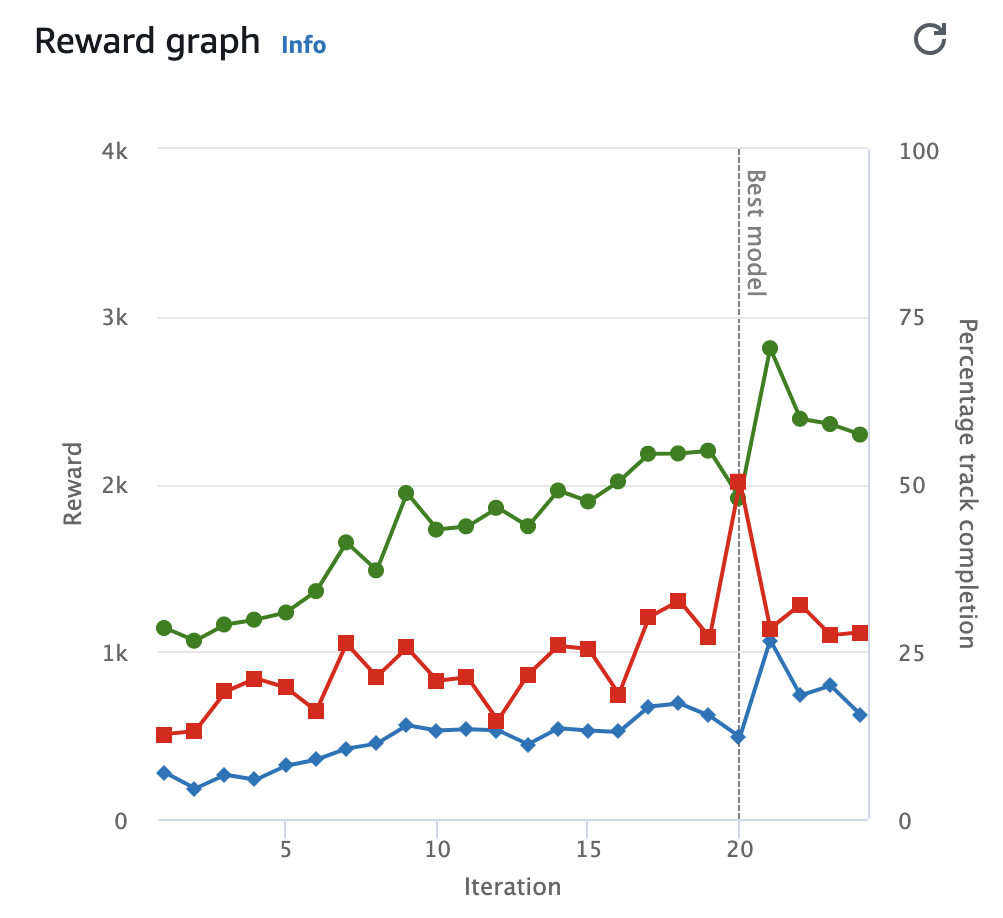



**Hyperparameters:**


*   Gradient descent batch size: 64
*   Entropy: 0.01
*   Discount factor: 0.999
*   Loss type: Huber
*   Learning Rate: 0.0003
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continous
*   Speed: [ 0.5 : 3 ] m/s
*   Steering angle: [ -30 : 30 ] °



In [ ]:
# Reward Function v1 - 4/8/2021
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 3.5                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 2                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.4 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 1e2 # I'll set it to a placeholder value like 100 for now to see how effective it'll be -ET  

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.2
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.8
  else:
    reward *= 0.5

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.25 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
  # If the car is not steering that much, then it is probably going straight; therefore, if it is going fast, probably reward it a bit to incentivize faster speeds in straight lines -ET
  if abs(steering) < 0.1 and speed > 3 and speed < speed_thres_max: 
    current_reward *= 1.1
  
  # Complete laps in fewer steps
  if progress == 100:     # in general, completing a lap should be rewarding to encourage finishing but be balanced such that they prioritize risky behavior to always get a complete lap -
    reward += 200
  else:
    reward += progress
  
  # 1 second is 15 steps so if a car takes 1:30 to do a lap, then that means it took 90 * 15 steps; thus, reward accordingly using the fastest (at the moment) time completion as a reference
  reward -= 0.5 * steps # this will be a test to see if this deduction based on step number will cause the car to try to be faster -ET
  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

On this model, I tried using my first continuous racer, whereas the first 4 I tried were all discrete racers. By only changing the racing vehicle, I used model 4 (Grace4) as a direct comparison between continuous racers and discrete racers. This training graph was more linear and my best model was towards the end of training so I learned that our reward function (although it was unstable) is more successful with a racer that has a continuous action space. However, this model wasn't very successful during the evaluation or April Qualifier. 

## Model 6 (Grace5-clone)

*  Track Trained On: Lars Loop
*  Time Trained: 1 hour
*  Training graph analysis: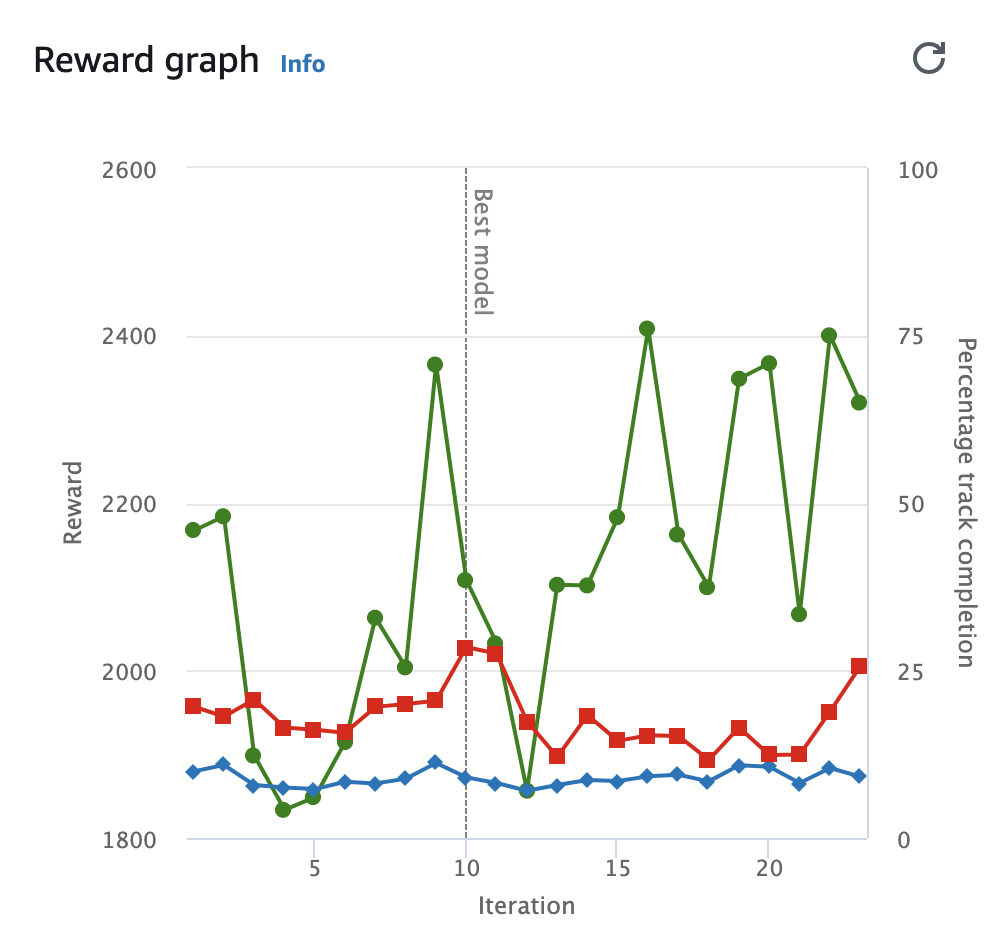



**Hyperparameters:**


*   Gradient descent batch size: 64
*   Entropy: 0.01
*   Discount factor: 0.999
*   Loss type: Huber
*   Learning Rate: 0.0003
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continous
*   Speed: [ 0.5 : 3 ] m/s
*  Steering angle: [ -30 : 30 ] °

In [ ]:
# Reward Function v1 - 4/8/2021
import math # import the math library to use mathematical functions

def reward_function(params):
  # Reading input variables
  all_wheels_on_track = params['all_wheels_on_track']
  distance_from_center = params['distance_from_center']
  is_reversed = params['is_reversed']
  is_offtrack = params['is_offtrack']
  progress = params['progress']
  speed = params['speed']
  steering = abs(params['steering_angle'])
  steps = params['steps']
  track_width = params['track_width']
  waypoints = params['waypoints']
  closest_waypoints = params['closest_waypoints']
  heading = params['heading']
  
  # Threshold variables to keep track of
  speed_thres_max = 3.5                   # the range of speed is from 0 to 5 m/s according to the input parameter reference sheet
  speed_thres_min = 2                     # the minimum accepted speed of the car
  center_dist_safe = track_width * 0.1    # the distance away from the center line that will offer the most reward probably since being close to the center line would prevent going offtrack and can offer better turning
  center_dist_extreme = track_width * 0.4 # the max distance away from the center line that would be allowed; otherwise, deviating too far from the center line would be reckless and unwise 
  direction_extreme = 10.0                # the direction heading threshold so that the car is not facing too incorrectly

  # Default reward value
  reward = 1e2 # I'll set it to a placeholder value like 100 for now to see how effective it'll be -ET  

  # Close to racing line
  if distance_from_center <= center_dist_safe: # Reward it for safer behavior; while being within extremes is nice, reward it not as much as that it will focus on being on the center -ET
    reward *= 1.2
  elif distance_from_center <= center_dist_extreme:
    reward *= 0.8
  else:
    reward *= 0.5

  # Speed compared to a desired speed limit
  if speed <= speed_thres_min:
    reward *= 0.5 # Punishing the car for going too slow so that it will try to complete the course (at the least) using the slowest allowed speed -ET
  elif speed <= speed_thres_max:
    reward *= 1.25 # Reward the car for being within the boundaries of acceptable speeds -ET
  else:
    reward *= 0.5 # Going too fast is just as bad as going too slow as it can accumulate time if the car goes off course which will lead to 5 second penalties -ET    

  # If the racer is heading down right direction, then we make the reward function follow such behavior
  # For now, I am putting placeholder code that is the sample reward function they give on the subject
  next_point = waypoints[closest_waypoints[1]]
  prev_point = waypoints[closest_waypoints[0]]

  # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
  track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
  # Convert to degree
  track_direction = math.degrees(track_direction)

  # Calculate the difference between the track direction and the heading direction of the car
  direction_diff = abs(track_direction - heading)
  if direction_diff > 180:
    direction_diff = 360 - direction_diff

  # Penalize the reward if the difference is too large
  if direction_diff > direction_extreme:
    reward *= 0.5
  # If the car is not steering that much, then it is probably going straight; therefore, if it is going fast, probably reward it a bit to incentivize faster speeds in straight lines -ET
  if abs(steering) < 0.1 and speed > 3 and speed < speed_thres_max: 
    current_reward *= 1.1
  
  # Complete laps in fewer steps
  if progress == 100:     # in general, completing a lap should be rewarding to encourage finishing but be balanced such that they prioritize risky behavior to always get a complete lap -
    reward += 200
  else:
    reward += progress
  
  # 1 second is 15 steps so if a car takes 1:30 to do a lap, then that means it took 90 * 15 steps; thus, reward accordingly using the fastest (at the moment) time completion as a reference
  reward -= 0.5 * steps # this will be a test to see if this deduction based on step number will cause the car to try to be faster -ET
  
  # Punishment if car goes off track
  if not all_wheels_on_track: # going completely offtrack or crashing is more serious an offence than not having all wheels on track, but both are still really bad 
    if is_offtrack or is_reversed:
       reward = 1e-3
    else:
       reward = 1e-2  
  return float(reward)

This model was the second half of our inquiry on how a cloned model performs on the Lars Loop after first being trained on the AWS Summit Raceway. Overall, this reward function was unstable and the time I trained it wasn't very long (1 hour), so that likely contributed to it's poor performance. The training graph does not represent a linear relationship, in fact, it is quite random. 

## Model 7 (Grace6)

*  Track Trained On: Lars Loop
*  Time Trained: 1 hour
*  Evaluation Performance (on April Qualifier): 02:09.376 (ranked 57/744)
*  Training graph analysis: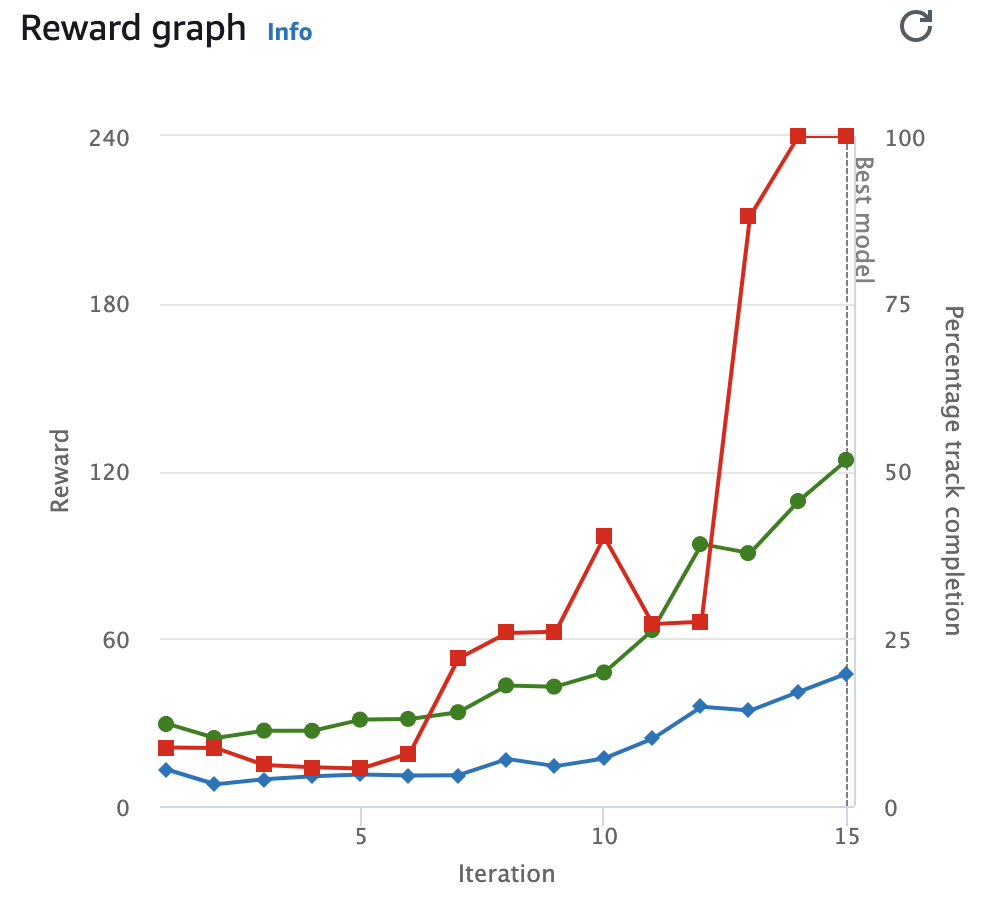



**Hyperparameters:**


*   Gradient descent batch size: 128
*   Entropy: 0.01
*   Discount factor: 0.99
*   Loss type: Huber
*   Learning Rate: 0.0001
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continous
*   Speed: [ 0.5 : 3 ] m/s
*  Steering angle: [ -30 : 30 ] °

In [ ]:
# Model 7 - Grace6
# default reward function from AWS (with adjusted values)
def reward_function(params):
    #############################################################################
    '''
    Example of using steps and progress
    '''

    # Read input variable
    steps = params['steps']
    progress = params['progress']

    # Total num of steps we want the car to finish the lap, it will vary depends on the track length
    TOTAL_NUM_STEPS = 200

    # Initialize the reward with typical value
    reward = 1.0

    # Give additional reward if the car pass every 100 steps faster than expected
    if (steps % 100) == 0 and progress > (steps / TOTAL_NUM_STEPS) * 100 :
        reward += 10.0

    return float(reward)

After the poor performance of our reward function, I decided to go back to basics and explore some of the default functions AWS gave examples of on their website to see how I could build on them to make them more efficient. There wasn't a ton of documentation on the input parameter "steps" (or at least it was difficult to find when I researched it), so I decided to try it out. I adjusted the value of TOTAL_NUM_STEPS to 200 from 300 because I found in a forum discussion that 150-180 is the speculated number of steps that the top racers were using. I went down to 200 rather than 150-180 because I read that you have to train your racer to get to that point, you can't just start them out at the ultimate step goal. This model worked very well for me and the training graph was linearly positive. This model ranked 57/744 when I submitted it to the April Qualifier. This was my first time breaking the top 10% of the leaderboards so I was pleased with it's performance.

## Model 8 (Grace7)

*  Track Trained On: Lars Loop
*  Time Trained: 1 hour
*  Training graph analysis: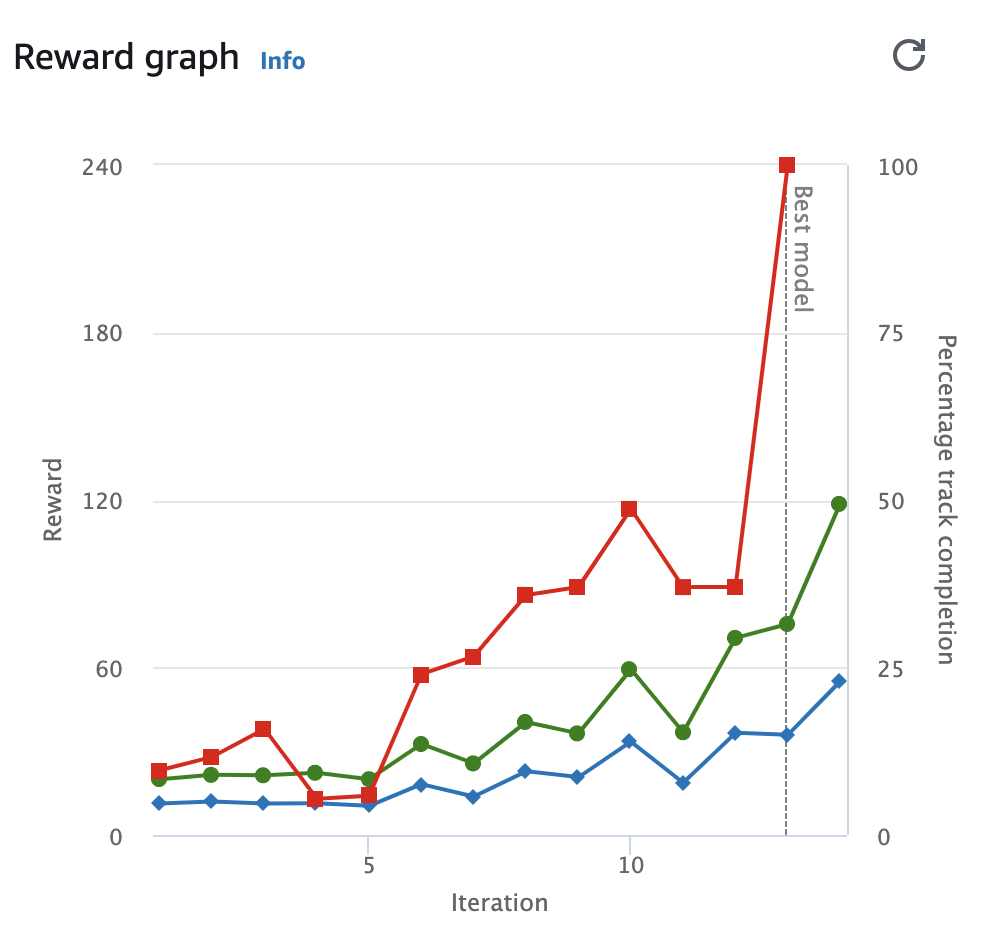



**Hyperparameters:**


*   Gradient descent batch size: 128
*   Entropy: 0.01
*   Discount factor: 0.99
*   Loss type: Huber
*   Learning Rate: 0.0001
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continous
*   Speed: [ 0.5 : 3 ] m/s
*  Steering angle: [ -30 : 30 ] °

In [ ]:
# Model 8 - Grace7
# combination of two default AWS reward functions (with adjusted values)
import math
def reward_function(params):
    #############################################################################
    '''
    Example of using all_wheels_on_track and speed
    '''

    # Read input variables
    all_wheels_on_track = params['all_wheels_on_track']
    speed = params['speed']

    # Set the speed threshold based your action space
    SPEED_THRESHOLD = 1.0

    if not all_wheels_on_track:
        # Penalize if the car goes off track
        reward = 1e-3
    elif speed < SPEED_THRESHOLD:
        # Penalize if the car goes too slow
        reward = 0.5
    else:
        # High reward if the car stays on track and goes fast
        reward = 1.0

    # Read input variable
    steps = params['steps']
    progress = params['progress']

    # Total num of steps we want the car to finish the lap, it will vary depends on the track length
    TOTAL_NUM_STEPS = 200

    # Initialize the reward with typical value
    reward = 1.0

    # Give additional reward if the car pass every 100 steps faster than expected
    if (steps % 100) == 0 and progress > (steps / TOTAL_NUM_STEPS) * 100 :
        reward += 10.0

    # Read input variables
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']

    # Initialize the reward with typical value
    reward = 1.0

    # Calculate the direction of the center line based on the closest waypoints
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]

    # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    # Convert to degree
    track_direction = math.degrees(track_direction)

    # Calculate the difference between the track direction and the heading direction of the car
    direction_diff = abs(track_direction - heading)
    if direction_diff > 180:
        direction_diff = 360 - direction_diff

    # Penalize the reward if the difference is too large
    DIRECTION_THRESHOLD = 10.0
    if direction_diff > DIRECTION_THRESHOLD:
        reward *= 0.5
        
    return float(reward)

In this model, I decided to combine some example reward functions focusing on waypoints, speed, and steps/progress. It was similar to my Grace6, but I thought that increasing the amount of specificities in the reward function would help the racer go faster. This model was similar in performance to Grace6 but when I submitted it to the April Qualifier, it was a few seconds slower. This is why I decided to clone Grace6 rather than Grace7 even though it was a more complex reward function. Additionally, Grace6 had more experience during training completing the track 100% than Grace7 did. 

## Model 9 (Grace6-clone)

*  Track Trained On: Lars Loop
*  Time Trained: 1 hour
*  Evaluation Performance (on April Qualifier): 02:30.833
*  Training graph analysis: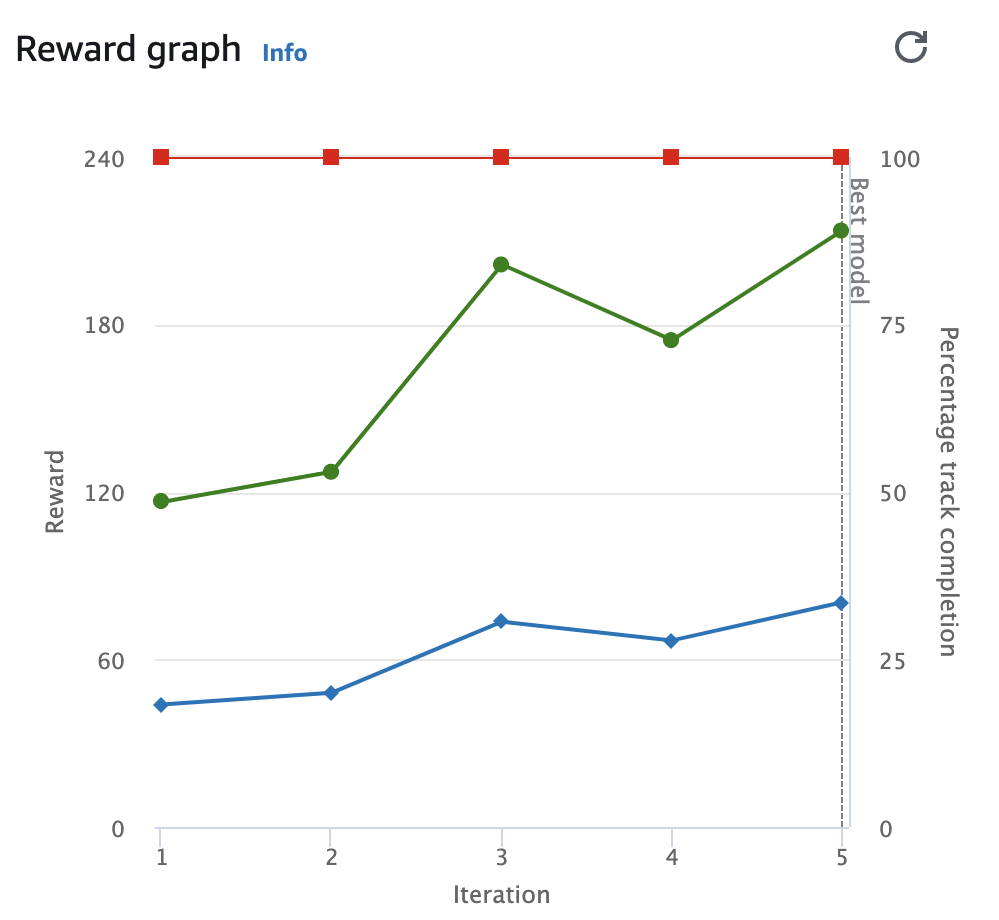


**Hyperparameters:**


*   Gradient descent batch size: 256
*   Entropy: 0.01
*   Discount factor: 0.99
*   Loss type: Huber
*   Learning Rate: 0.0001
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continuous
*   Speed: [ 0.5 : 3 ] m/s
*  Steering angle: [ -30 : 30 ] °

In [ ]:
# Model 9 - Grace6-clone
# default reward function from AWS (with modified values)
def reward_function(params):
    #############################################################################
    '''
    Example of using steps and progress
    '''

    # Read input variable
    steps = params['steps']
    progress = params['progress']

    # Total num of steps we want the car to finish the lap, it will vary depends on the track length
    TOTAL_NUM_STEPS = 180

    # Initialize the reward with typical value
    reward = 1.0

    # Give additional reward if the car pass every 100 steps faster than expected
    if (steps % 100) == 0 and progress > (steps / TOTAL_NUM_STEPS) * 100 :
        reward += 10.0

    return float(reward)

With this model, I attempted to improve upon my model Grace6 by cloning it, lowering the total number of steps in the reward function (from 200 to 180), and increasing batch size (from 128 to 256). I think where I went wrong in this model was the batch size increase. For only training it for one hour, the model wasn't able to get many iterations in before training time was up. 

# My First Alt Account

## Model 1 (FastCar)

*  Track Trained On: Lars Loop
*  Time Trained: 5 hours
*  Evaluation Performance (on April Qualifier): 01:54.358 (ranked 36/790)
*  Training graph analysis: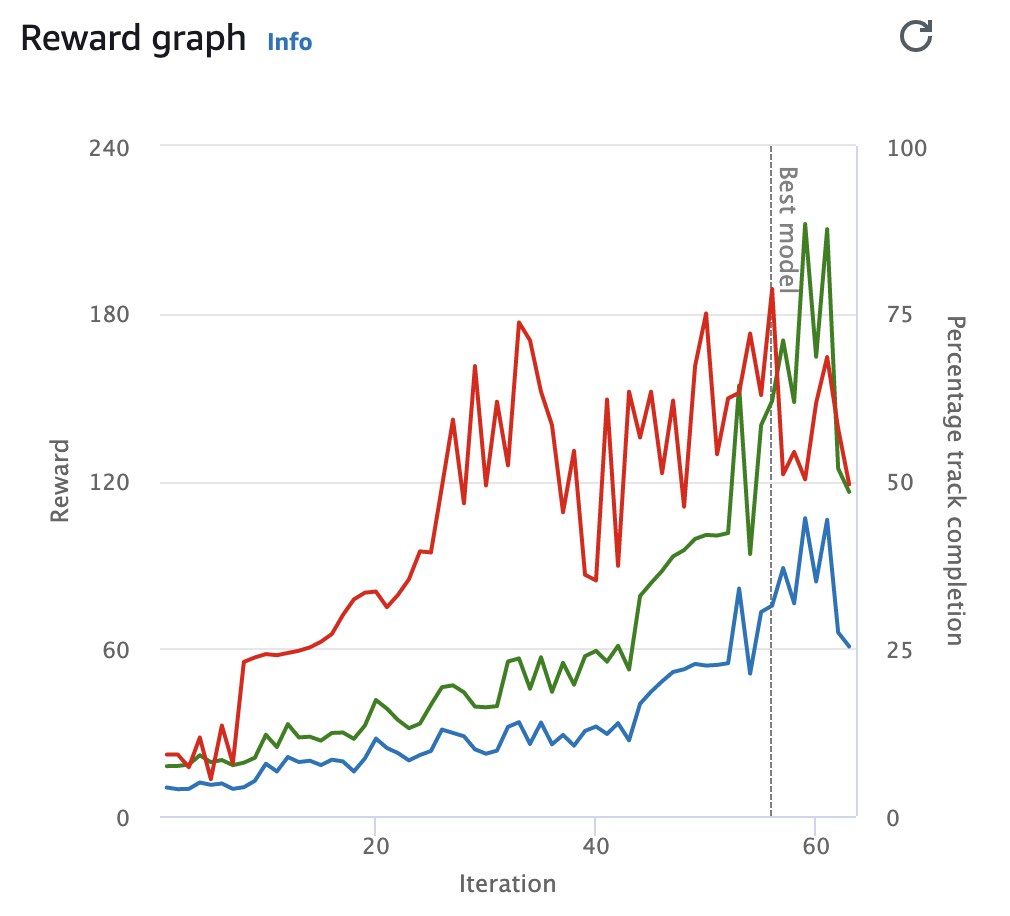

**Hyperparameters:**


*   Gradient descent batch size: 128
*   Entropy: 0.01
*   Discount factor: 0.99
*   Loss type: Huber
*   Learning Rate: 0.0001
*   Number of experience episodes between each policy-updating iteration: 20
*   Number of epochs: 10


**Action Space:**

*   Continuous
*   Speed: [ 1 : 4 ] m/s
*  Steering angle: [ -30 : 30 ] °

In [ ]:
# Model 1 Alt Account - FastCar
def reward_function(params):
    #############################################################################
    '''
    Example of using steps and progress
    '''

    # Read input variable
    steps = params['steps']
    progress = params['progress']

    # Total num of steps we want the car to finish the lap, it will vary depends on the track length
    TOTAL_NUM_STEPS = 200

    # Initialize the reward with typical value
    reward = 1.0

    # Give additional reward if the car pass every 100 steps faster than expected
    if (steps % 100) == 0 and progress > (steps / TOTAL_NUM_STEPS) * 100 :
        reward += 10.0
      
  
    '''
    Example of using all_wheels_on_track and speed
    '''

    # Read input variables
    all_wheels_on_track = params['all_wheels_on_track']
    speed = params['speed']

    # Set the speed threshold based your action space
    SPEED_THRESHOLD = 1.0

    if not all_wheels_on_track:
        # Penalize if the car goes off track
        reward = 1e-3
    elif speed < SPEED_THRESHOLD:
        # Penalize if the car goes too slow
        reward = 0.5
    else:
        # High reward if the car stays on track and goes fast
        reward = 1.0

    return float(reward)

Once I figured out what reward functions worked and what didn't, I chose my best model from my original account, adjusted the reward function slightly and fixed the issues I found (such as a batch size of 256 is too high for 1 hour training session). Then I made an alt account for the purposes of training my best model for 5 hours, cloning it (so long as it performed at least as well as my prior models) and then training the clone for an additional 5 hours. After talking with Eric about him doing this with his second alt account, it resulted well for him and after I found a model that performed well for me, I decided to do the same. This reward function focuses on the progress of the racer as well as the speed, which is something Grace6 (my best reward function from my initial account) didn't incorporate. I am one hour into the training of FastCar-Clone, which is why you don't see the specs of the model on this document, but the training graph is headed in a positive linear direction. 

# Scalzo Comments


*   Overall Approach: How are we going to summarize all our work in a written report (be as specific and systematic as possible regarding hyperparameters, action space, etc.)
*   Figure out exactly what we want (reward function/model) and then change one thing at time (hyperparameters) to observe how it effects the model's performance
*   Instead of hard threshold/step function, consider using soft margin/exponential decay reward function
*   Curve fitting using waypoints ==> distance transform 





